# Covid-19 in Ukraine Project

#### In this notebook we have 10 sections:
<ul>
    <li><b>Section 1:</b>In this section we will study the data graphically to get a better understanding about the evaluation of coronavirus cases and deaths.</li>
    <li><b>Section 2:</b>You will meet in this section how is the relation between the columns, and this section will give us a step forward in the evaluation of each column in the data.</li>
    <li><b>Section 3:</b>We will call this section, the "Machine Learning Section". We will train our data using linear regression model and try to predict the values in the upcoming days, and deduce the best model.</li>
    <li><b>Section 4:</b>Here we will try the model of non-linear regression.</li>
    <li><b>Section 5:</b>You can see here the results of using Lasso Regression</li>
    <li><b>Section 6:</b>Also here we will try to use Ridge Regression.</li>
    <li><b>Section 7:</b>We used a model called Kernel Ridge Regression.</li>
    <li><b>Section 8:</b>We used a model called ElasticNet.</li>
    <li><b>Section 9:</b>We used a model called ElasticNetCV.</li>
    <li><b>Section 10:</b>We used a model called KNeighborsRegressor (KNR).</li>
    <li><b>Section 11:</b>The last section in our notebook, results and discussions.</li>
</ul>

In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1

In [2]:
# reading the data as a pandas DataFrame
df = pd.read_csv("covid.csv")

In [3]:
# Dropping rows where we have missing data
list=[x for x in range(0,25)]
df.drop(list,axis=0,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# Resetting the indexes after dropping
df.index=np.arange(0,len(df))

In [5]:
list=[x for x in range(230,len(df))]
df.drop(list,axis=0,inplace=True)

In [6]:
# adding a column called Day which will help us working with days insted of saying for example the day where
# the date is '01-01-2020', we can say the day 2.
df['Day']=df.index

In [7]:
# according to the high difference between new cases and new deaths, we will add a column which is the number of new cases
# per day divided by 10
df['new_cases /10']=df['new_cases']/10

In [8]:
# take a look about the first 5 rows of the data
df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,Day,new_cases /10
0,2020-03-29,480.0,62.0,11.0,3.0,0,6.2
1,2020-03-30,645.0,165.0,17.0,6.0,1,16.5
2,2020-03-31,794.0,149.0,20.0,3.0,2,14.9
3,2020-04-01,897.0,103.0,22.0,2.0,3,10.3
4,2020-04-02,1072.0,175.0,27.0,5.0,4,17.5


In [9]:
# check the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 7 columns):
date             230 non-null object
total_cases      230 non-null float64
new_cases        230 non-null float64
total_deaths     230 non-null float64
new_deaths       230 non-null float64
Day              230 non-null int64
new_cases /10    230 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.4+ KB


In [10]:
# interesting statistical values about the data
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,Day,new_cases /10
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,115781.404348,2281.947826,2361.830435,41.165217,114.500000,228.194783
std,128838.445638,2697.708048,2325.903024,46.290884,66.539462,269.770805
min,480.000000,26.000000,11.000000,1.000000,0.000000,2.600000
25%,21664.250000,488.250000,647.500000,13.000000,57.250000,48.825000
50%,61423.000000,930.500000,1542.500000,21.000000,114.500000,93.050000
75%,168665.000000,2964.000000,3451.000000,51.000000,171.750000,296.400000
max,525176.000000,12524.000000,9508.000000,201.000000,229.000000,1252.400000


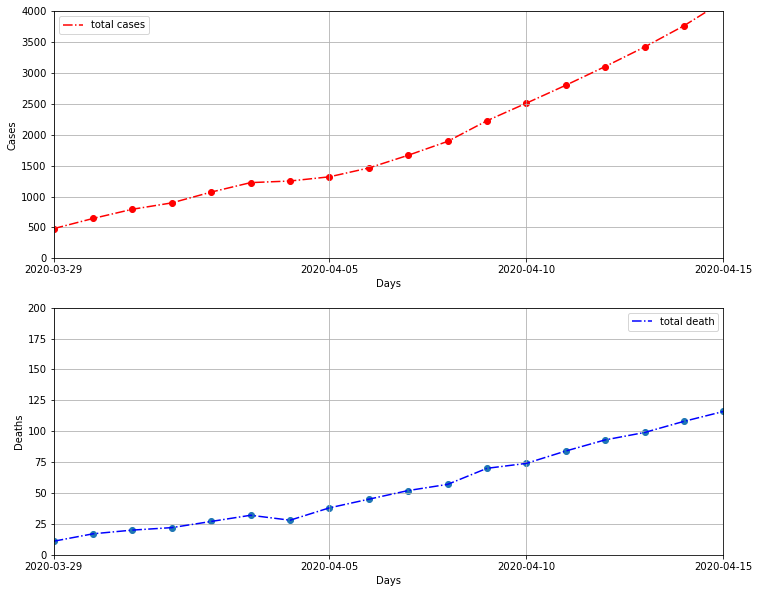

In [11]:
# plotting the total cases and total deaths between 29-03-2020 and 15-04-2020
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['date'], df['total_cases'],color='red',linestyle= '-.')
ax[1].plot(df['date'], df['total_deaths'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Deaths")
ax[1].set_xlabel('Days')

ax[0].legend(['total cases'])
ax[1].legend(['total death'])

ax[0].set_xlim('2020-03-29','2020-04-15')
ax[1].set_xlim('2020-03-29','2020-04-15')
ax[0].set_ylim(0,4000)
ax[1].set_ylim(0,200)

ax[0].set_xticks(['2020-03-29','2020-04-05','2020-04-10','2020-04-15'])
ax[1].set_xticks(['2020-03-29','2020-04-05','2020-04-10','2020-04-15'])

ax[0].scatter(df['date'][0:18],df['total_cases'][0:18],c='red')
ax[1].scatter(df['date'][0:18],df['total_deaths'][0:18])

ax[0].grid()
ax[1].grid()

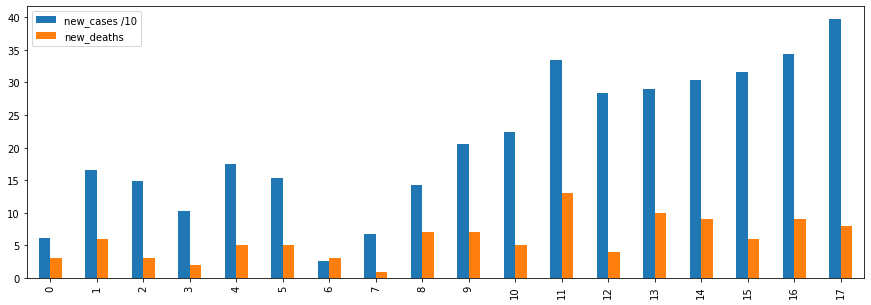

In [12]:
# plotting the new cases and new deaths in the same duration using histograms
df[['new_cases /10','new_deaths']][0:18].plot.bar(figsize=(15,5))

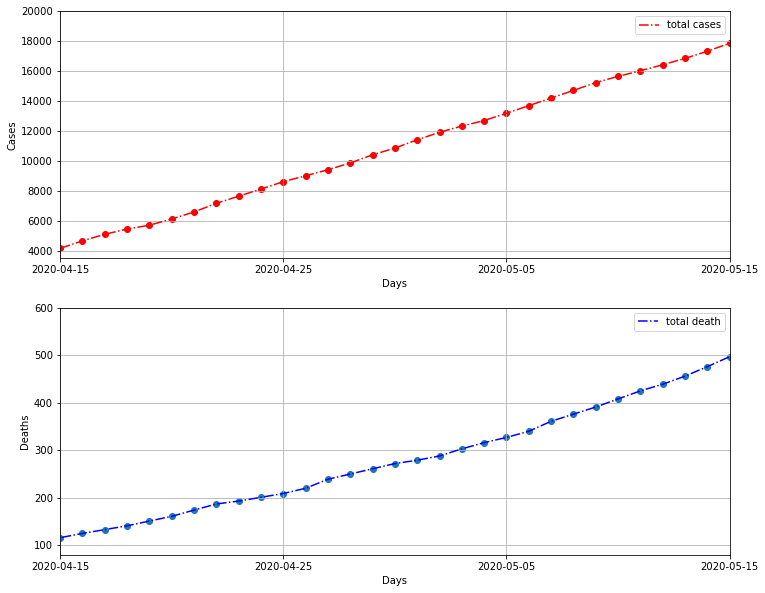

In [13]:
# plotting the total cases and total deaths between 15-04-2020 and 15-05-2020
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['date'], df['total_cases'],color='red',linestyle= '-.')
ax[1].plot(df['date'], df['total_deaths'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Deaths")
ax[1].set_xlabel('Days')

ax[0].legend(['total cases'])
ax[1].legend(['total death'])

ax[0].set_xlim('2020-04-15','2020-05-15')
ax[1].set_xlim('2020-04-15','2020-05-15')
ax[0].set_ylim(3500,20000)
ax[1].set_ylim(80,600)

ax[0].set_xticks(['2020-04-15','2020-04-25','2020-05-05','2020-05-15'])
ax[1].set_xticks(['2020-04-15','2020-04-25','2020-05-05','2020-05-15'])

ax[0].scatter(df['date'][17:48],df['total_cases'][17:48],c='red')
ax[1].scatter(df['date'][17:48],df['total_deaths'][17:48])

ax[0].grid()
ax[1].grid()

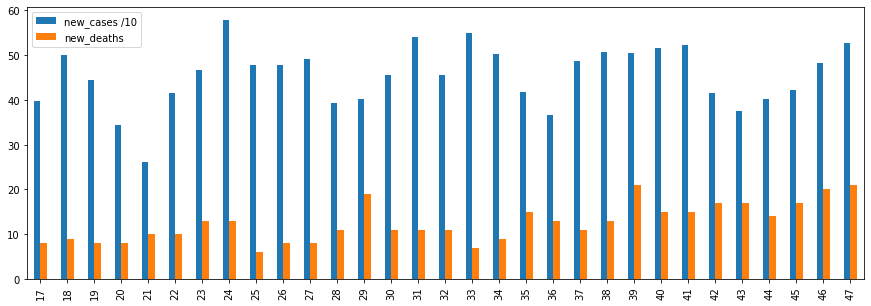

In [14]:
# plotting the new cases and new deaths in the same duration using histograms
df[['new_cases /10','new_deaths']][17:48].plot.bar(figsize=(15,5))

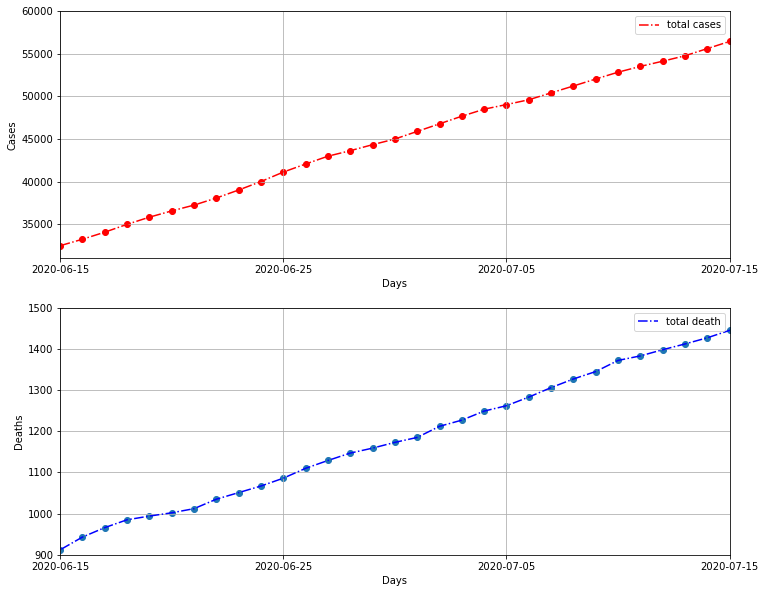

In [15]:
# plotting the total cases and total deaths between 15-06-2020 and 15-07-2020
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['date'], df['total_cases'],color='red',linestyle= '-.')
ax[1].plot(df['date'], df['total_deaths'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Deaths")
ax[1].set_xlabel('Days')

ax[0].legend(['total cases'])
ax[1].legend(['total death'])

ax[0].set_xlim('2020-06-15','2020-07-15')
ax[1].set_xlim('2020-06-15','2020-07-15')
ax[0].set_ylim(31000,60000)
ax[1].set_ylim(900,1500)

ax[0].set_xticks(['2020-06-15','2020-06-25','2020-07-05','2020-07-15'])
ax[1].set_xticks(['2020-06-15','2020-06-25','2020-07-05','2020-07-15'])

ax[0].scatter(df['date'][78:109],df['total_cases'][78:109],c='red')
ax[1].scatter(df['date'][78:109],df['total_deaths'][78:109])

ax[0].grid()
ax[1].grid()

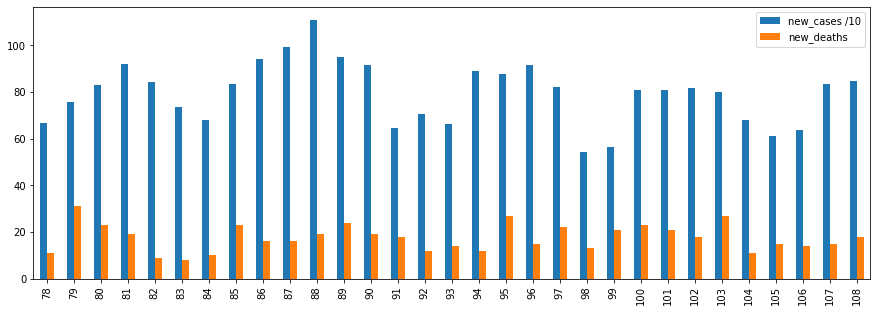

In [16]:
# plotting the new cases and new deaths in the same duration using histograms
df[['new_cases /10','new_deaths']][78:109].plot.bar(figsize=(15,5))

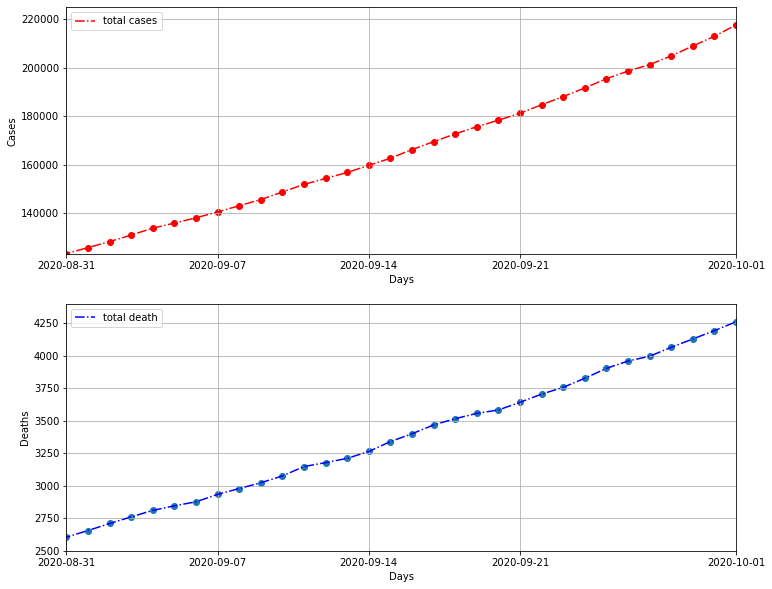

In [17]:
# plotting the total cases and total deaths between 31-08-2020 and 01-10-2020
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['date'], df['total_cases'],color='red',linestyle= '-.')
ax[1].plot(df['date'], df['total_deaths'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Deaths")
ax[1].set_xlabel('Days')

ax[0].legend(['total cases'])
ax[1].legend(['total death'])

ax[0].set_xlim('2020-08-31','2020-10-01')
ax[1].set_xlim('2020-08-31','2020-10-01')
ax[0].set_ylim(123000,225000)
ax[1].set_ylim(2500,4400)

ax[0].set_xticks(['2020-08-31','2020-09-07','2020-09-14','2020-09-21','2020-10-01'])
ax[1].set_xticks(['2020-08-31','2020-09-07','2020-09-14','2020-09-21','2020-10-01'])

ax[0].scatter(df['date'][155:187],df['total_cases'][155:187],c='red')
ax[1].scatter(df['date'][155:187],df['total_deaths'][155:187])

ax[0].grid()
ax[1].grid()

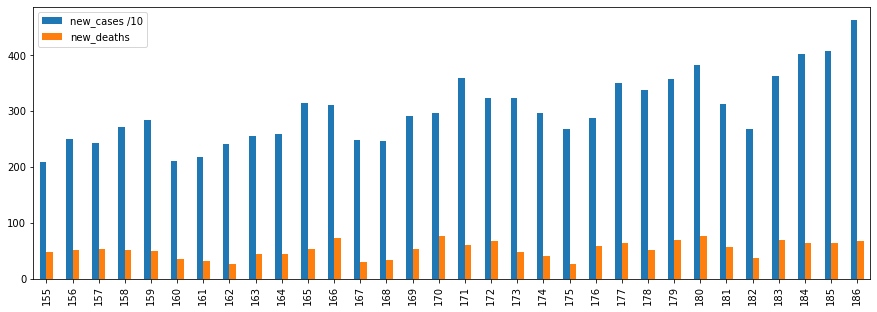

In [18]:
# plotting the new cases and new deaths in the same duration using histograms
df[['new_cases /10','new_deaths']][155:187].plot.bar(figsize=(15,5))

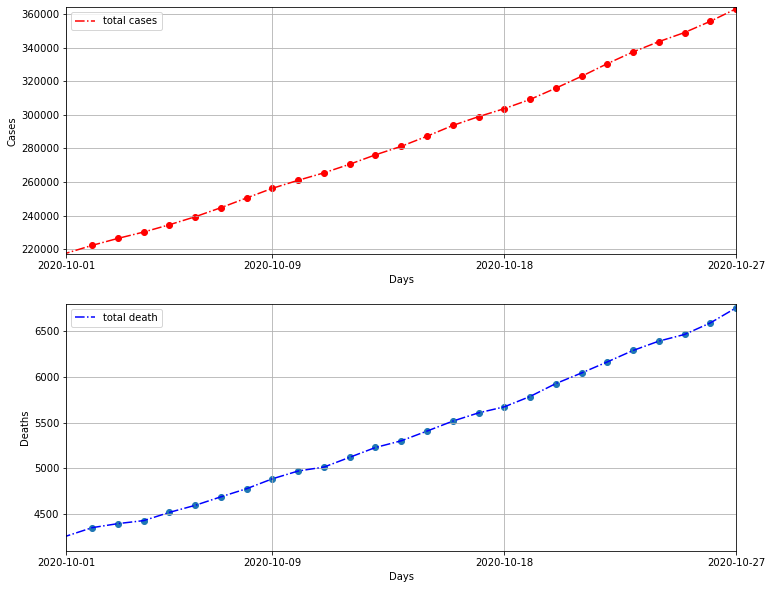

In [19]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['date'], df['total_cases'],color='red',linestyle= '-.')
ax[1].plot(df['date'], df['total_deaths'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Deaths")
ax[1].set_xlabel('Days')

ax[0].legend(['total cases'])
ax[1].legend(['total death'])

ax[0].set_xlim('2020-10-01','2020-10-27')
ax[1].set_xlim('2020-10-01','2020-10-27')
ax[0].set_ylim(217000,364000)
ax[1].set_ylim(4100,6800)

ax[0].set_xticks(['2020-10-01','2020-10-09','2020-10-18','2020-10-27'])
ax[1].set_xticks(['2020-10-01','2020-10-09','2020-10-18','2020-10-27'])

ax[0].scatter(df['date'][187:],df['total_cases'][187:],c='red')
ax[1].scatter(df['date'][187:],df['total_deaths'][187:])

ax[0].grid()
ax[1].grid()

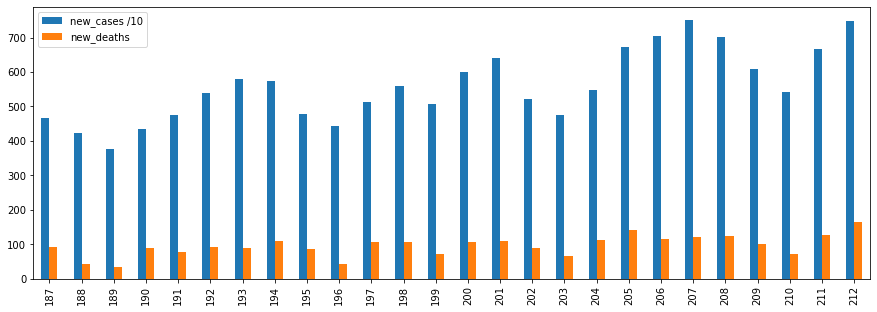

In [20]:
# plotting the new cases and new deaths in the same duration using histograms
df[['new_cases /10','new_deaths']][187:213].plot.bar(figsize=(15,5))

## Section 2

In [21]:
# creating a new column called "month"
df['month']=0
for i in range(0,len(df)):
    df['month'][i]=df['date'][i][5:7]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
# A few statistical values of each month from month 3 "March" to month 10 "October"
dfm = df.groupby("month")
dfm['new_cases','new_deaths'].describe()

new_cases                                                               \
          count         mean          std     min      25%     50%       75%   
month                                                                          
3           3.0   125.333333    55.428633    62.0   105.50   149.0    157.00   
4          30.0   335.566667   147.022561    26.0   233.25   343.5    455.75   
5          31.0   424.225806    77.608294   259.0   370.50   429.0    485.00   
6          30.0   699.533333   186.616837   328.0   561.75   682.0    832.00   
7          31.0   840.580645   164.221755   543.0   765.50   829.0    916.50   
8          31.0  1685.387097   429.270597   990.0  1375.50  1658.0   2037.50   
9          30.0  2990.833333   530.948993  2107.0  2558.75  2931.5   3339.00   
10         31.0  5887.161290  1303.508985  3774.0  4767.00  5590.0   6866.50   
11         13.0  9979.692308  1466.314051  6754.0  9397.00  9850.0  10746.00   

               new_deaths                                                      \
           max      count        mean        std   min     25%    50%     75%   
month                                                                           
3        165.0        3.0    4.000000   1.732051   3.0    3.00    3.0    4.50   
4        578.0       30.0    8.333333   3.744728   1.0    6.00    8.0   10.75   
5        550.0       31.0   14.387097   4.136645   6.0   11.50   15.0   17.00   
6       1109.0       30.0   15.166667   5.813678   8.0   10.25   14.5   19.00   
7       1197.0       31.0   17.290323   4.762307   8.0   13.50   17.0   21.00   
8       2481.0       31.0   28.903226   9.346496  13.0   22.50   27.0   34.00   
9       4069.0       30.0   51.933333  14.764667  26.0   41.75   52.5   63.75   
10      8752.0       31.0  100.419355  33.001792  33.0   81.00  106.0  114.50   
11     12524.0       13.0  169.384615  39.942747  69.0  157.00  191.0  193.00   

              
         max  
month         
3        6.0  
4       19.0  
5       21.0  
6       31.0  
7       27.0  
8       49.0  
9       76.0  
10     173.0  
11     201.0

In [23]:
# This new dataframe will be used later for visualization
dfx = df.pivot_table(index='month')
dfx

,Day,new_cases,new_cases /10,new_deaths,total_cases,total_deaths
month,,,,,,
3,1.0,125.333333,12.533333,4.000000,639.666667,16.000000
4,17.5,335.566667,33.556667,8.333333,4917.633333,128.733333
5,48.0,424.225806,42.422581,14.387097,17959.451613,504.096774
6,78.5,699.533333,69.953333,15.166667,33688.200000,938.033333
7,109.0,840.580645,84.058065,17.290323,57624.935484,1454.451613
8,140.0,1685.387097,168.538710,28.903226,94795.516129,2118.548387
9,170.5,2990.833333,299.083333,51.933333,166217.200000,3383.800000
10,201.0,5887.161290,588.716129,100.419355,297380.516129,5599.322581
11,223.0,9979.692308,997.969231,169.384615,460195.384615,8437.461538


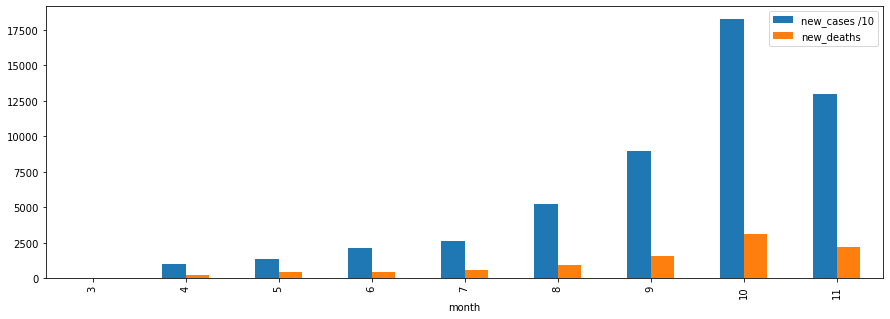

In [24]:
# plotting the new cases and new deaths for each month
dfm[['new_cases /10','new_deaths']].sum().plot.bar(figsize=(15,5))

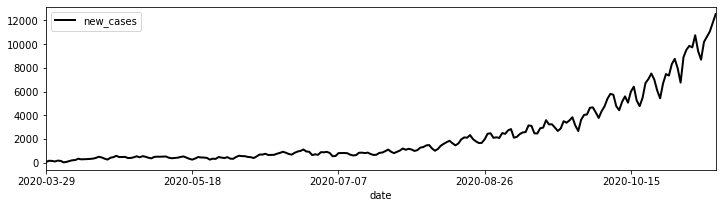

In [25]:
# plotting all the new cases per day
df.plot.line(x='date',y='new_cases',figsize=(12,3),lw=2,color='black')

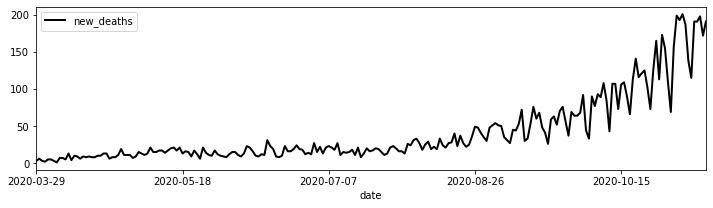

In [26]:
# plotting all the new cases per day
df.plot.line(x='date',y='new_deaths',figsize=(12,3),lw=2,color='black')

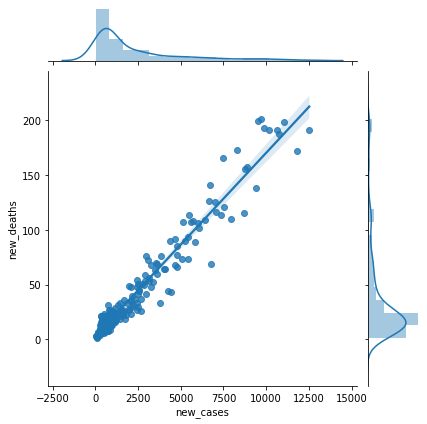

In [27]:
# Understanding the relation between new cases and new deaths using a joint plot
sns.jointplot(x='new_cases',y='new_deaths',data=df,kind='reg')

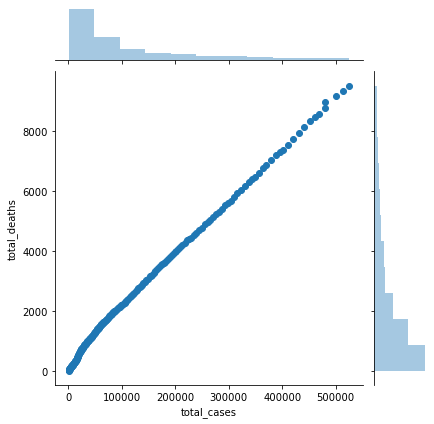

In [28]:
# Understanding the relation between total cases and total deaths using a joint plot
sns.jointplot(x='total_cases',y='total_deaths',data=df,kind='scatter')

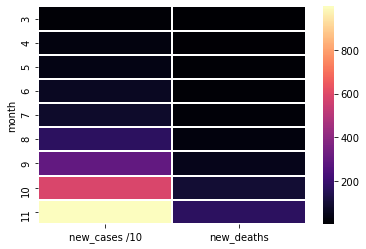

In [29]:
# heatmap
sns.heatmap(dfx[['new_cases /10','new_deaths']],cmap='magma',linecolor='white',linewidths=1)

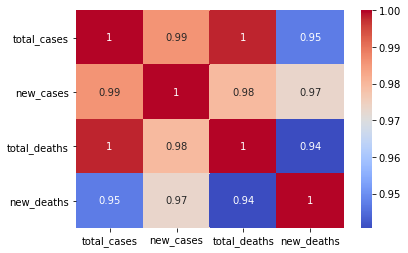

In [30]:
# heatmap for corrolation
sns.heatmap(df[['total_cases','new_cases','total_deaths','new_deaths']].corr(),cmap='coolwarm',annot=True)

In [31]:
dict = {'date':['2020-11-16','2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22'],'total_cases':[557657,570153,583510,598085,612665,624744,635689],'new_cases':[11968,12496,13357,14575,14580,12079,10945]}

In [32]:
data= pd.DataFrame(data=dict)
data.index = np.arange(232,239)

## Section 3

#### Linear Regression using 2 columns as features (Day and Total Cases)

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df[['Day','total_cases']]
y = df['new_cases']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# print the intercept
print(lm.intercept_)

353.8931609373251


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Day,-7.537343
total_cases,0.024176


In [41]:
predictions = lm.predict(X_test)

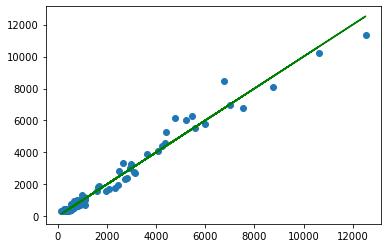

In [42]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

## Regression Evaluation Metrics


Here are two most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n \frac{|y_i-\hat{y}_i|}{y_i}$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n \frac{(y_i-\hat{y}_i)^2}{y_i}} $$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)/100,'%')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))/100,'%')

MAE: 2.646779801842994 %
RMSE: 4.123793665837473 %


> Even if the error here is low but we can't use this model, because we are using total cases to predict new cases which is something far from the reality. By conclusion, not everytime we find a high correlation between two columns that's mean that we arrived to our goal.

#### Linear Regression using 'Day' as a feature and NEW CASES as a target

In [45]:
X = df[['Day']]
y = df['new_cases']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=101)

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# print the intercept
print(lm.intercept_)

-1510.8564505255567


In [50]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Day,33.283878


In [51]:
predictions = lm.predict(X_test)

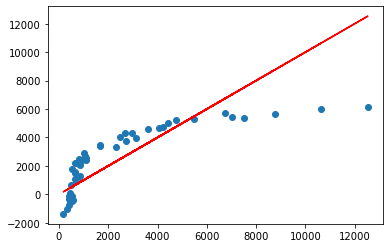

In [52]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='r')

In [53]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lm.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lm.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [54]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 1.6871483668842189 %
RMSE: 4.602947911541974 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [55]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [56]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [57]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=lm.predict([[i]]) + 6000
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [58]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,525176.000000
230,2020-11-14,12144.435497,537320.435497
231,2020-11-15,12177.719375,549498.154871
232,2020-11-16,12211.003253,561709.158124
233,2020-11-17,12244.287131,573953.445255
234,2020-11-18,12277.571009,586231.016264
235,2020-11-19,12310.854887,598541.871150
236,2020-11-20,12344.138765,610886.009915
237,2020-11-21,12377.422643,623263.432558
238,2020-11-22,12410.706521,635674.139079


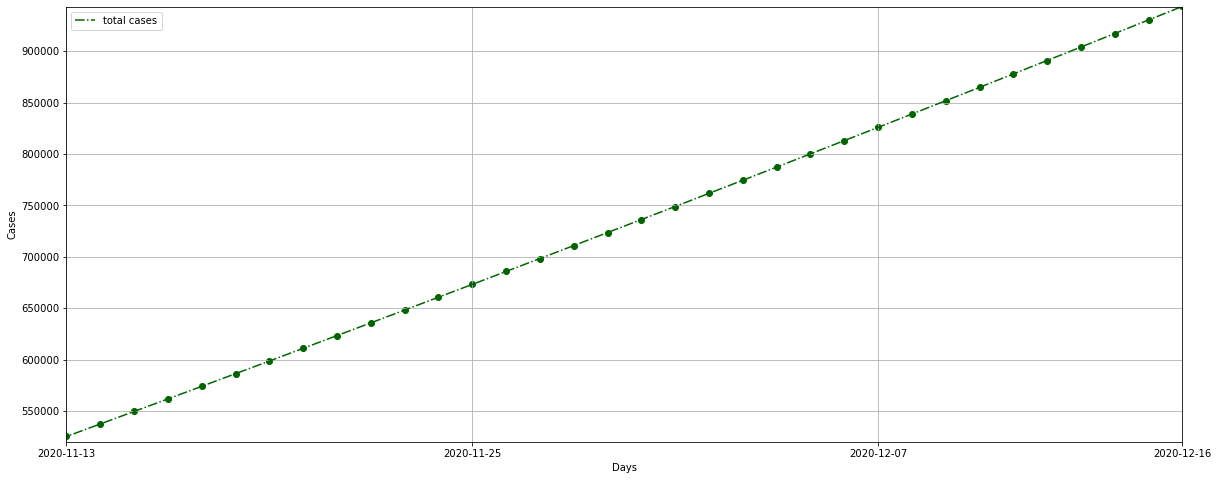

In [59]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,943000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

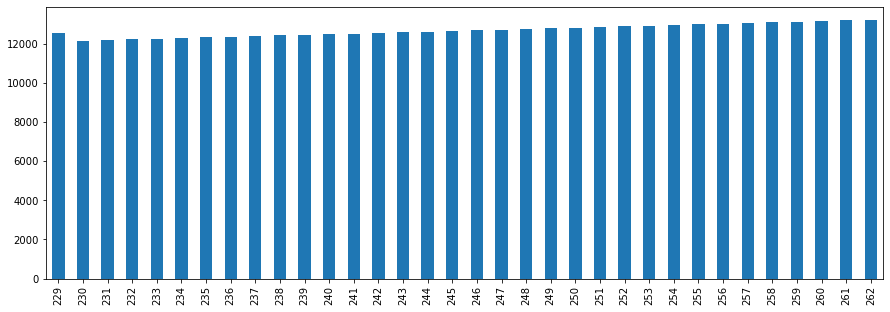

In [60]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [61]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [62]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(lm.predict([[i]])[0]+6000)
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,12211.003253,2.030442
233,2020-11-17,12496,12244.287131,2.014348
234,2020-11-18,13357,12277.571009,8.081373
235,2020-11-19,14575,12310.854887,15.534443
236,2020-11-20,14580,12344.138765,15.335125
237,2020-11-21,12079,12377.422643,2.470591
238,2020-11-22,10945,12410.706521,13.391563


#### Prognosis from 13/11/2020 to 31/12/2020

In [63]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [64]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [65]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=lm.predict([[i]]) + 6000
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [66]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,12144.435497,5.373204e+05
231,2020-11-15,12177.719375,5.494982e+05
232,2020-11-16,12211.003253,5.617092e+05
233,2020-11-17,12244.287131,5.739534e+05
234,2020-11-18,12277.571009,5.862310e+05
235,2020-11-19,12310.854887,5.985419e+05
236,2020-11-20,12344.138765,6.108860e+05
237,2020-11-21,12377.422643,6.232634e+05
238,2020-11-22,12410.706521,6.356741e+05


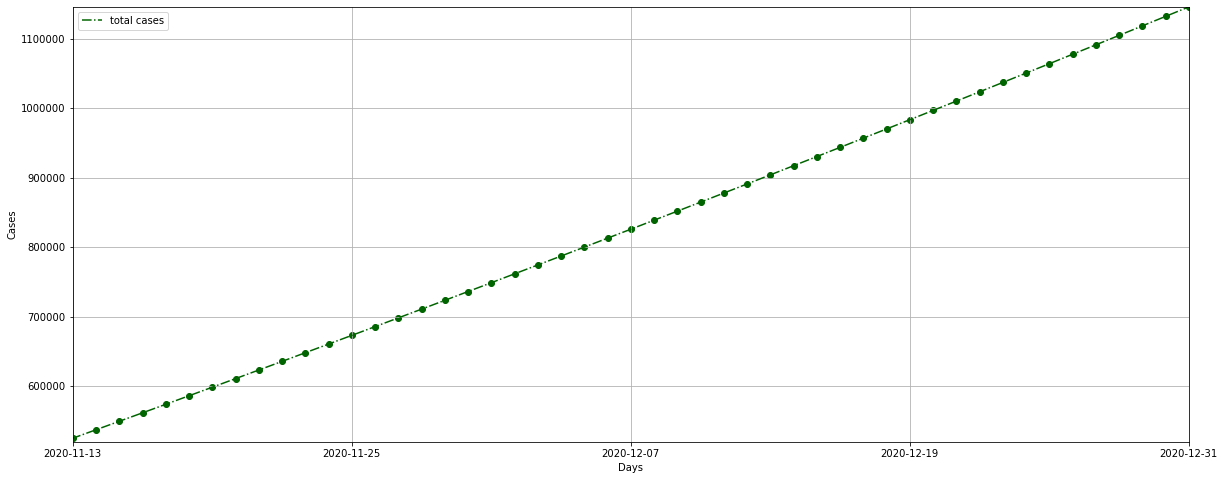

In [67]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1145600)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

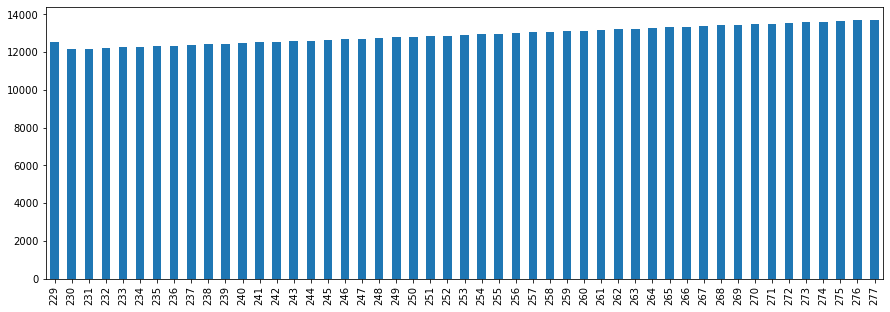

In [68]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [69]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Linear Regression using 'Day' as a feature and TOTAL CASES as a target

In [70]:
X = df[['Day']]
y = df['total_cases']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=101)

In [72]:
lm = LinearRegression()

In [73]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
predictions = lm.predict(X_test)

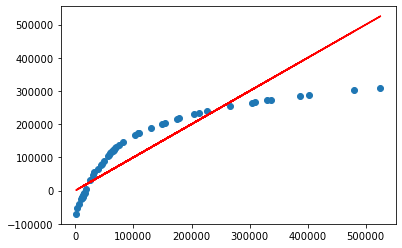

In [75]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='r')

In [76]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lm.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lm.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [77]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 4.96368501316325 %
RMSE: 18.3043972472763 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [78]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [79]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [80]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=lm.predict([[i]])+ 228928
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [81]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,539699.139823
231,2020-11-15,541386.427153
232,2020-11-16,543073.714484
233,2020-11-17,544761.001815
234,2020-11-18,546448.289145
235,2020-11-19,548135.576476
236,2020-11-20,549822.863807
237,2020-11-21,551510.151137
238,2020-11-22,553197.438468


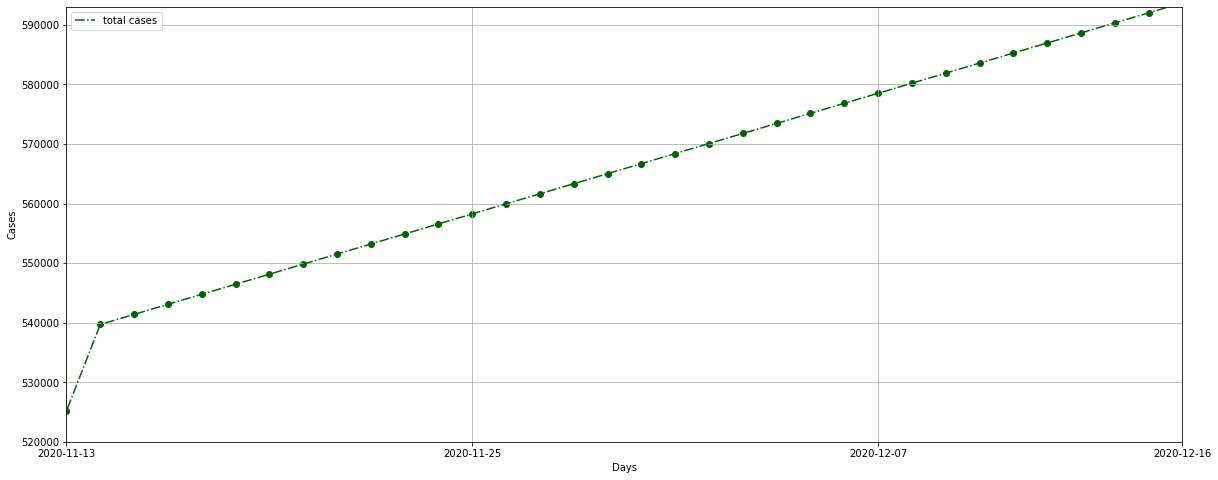

In [82]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,593000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

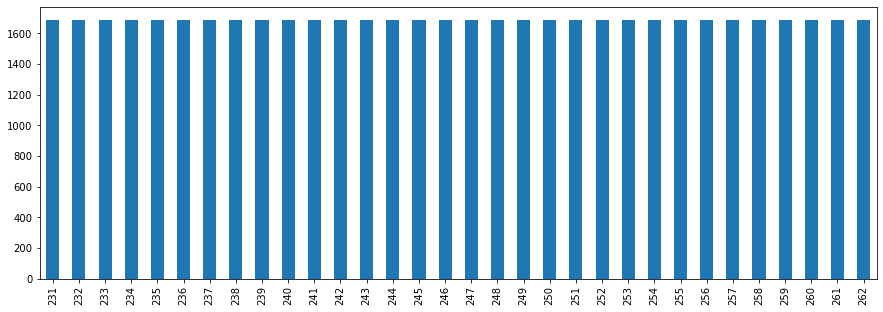

In [83]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [84]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [85]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(lm.predict([[i]])[0]+228928)
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,543073.714484,2.615100
233,2020-11-17,570153,544761.001815,4.453541
234,2020-11-18,583510,546448.289145,6.351513
235,2020-11-19,598085,548135.576476,8.351559
236,2020-11-20,612665,549822.863807,10.257177
237,2020-11-21,624744,551510.151137,11.722217
238,2020-11-22,635689,553197.438468,12.976717


#### Prognosis from 13/11/2020 to 31/12/2020

In [86]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [87]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [88]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=lm.predict([[i]])+ 228928
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [89]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,539699.139823
231,2020-11-15,541386.427153
232,2020-11-16,543073.714484
233,2020-11-17,544761.001815
234,2020-11-18,546448.289145
235,2020-11-19,548135.576476
236,2020-11-20,549822.863807
237,2020-11-21,551510.151137
238,2020-11-22,553197.438468


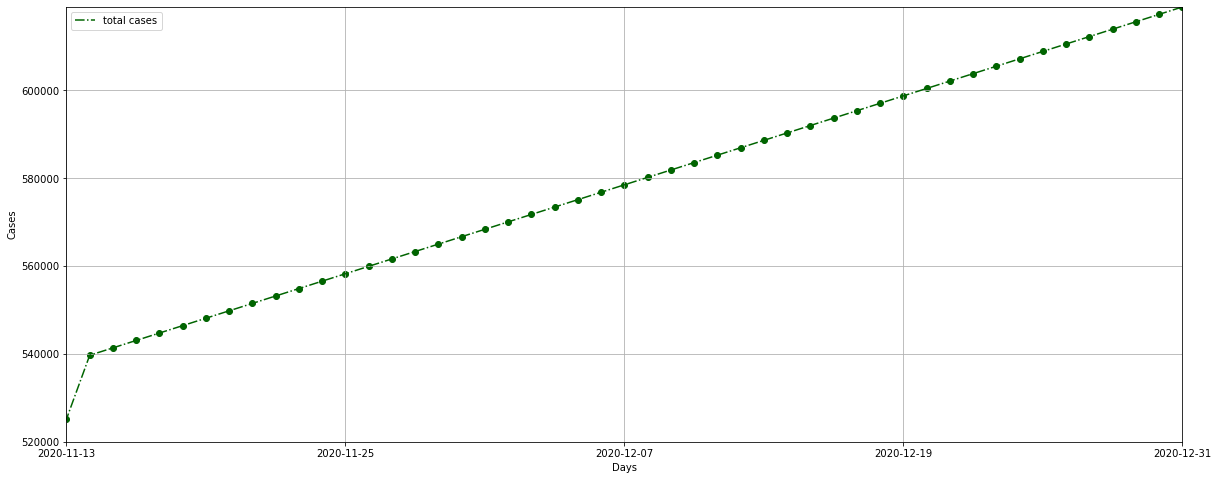

In [90]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,619001)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

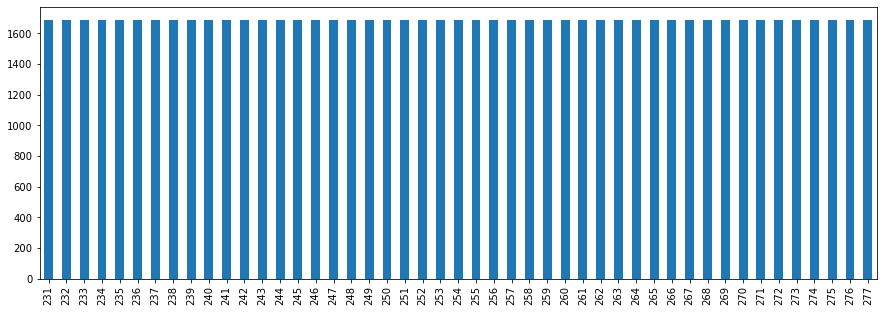

In [91]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [92]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

> We can see here that the error is very big if we want to predict the new cases using ONLY the column of Day. And we can deduce that <b>THE NON LINEAR REGRESSION MODEL IS BETTER THAN LINEAR REGRESSION</b>. We will verify this statement in the next section.

## Section 4

#### Polynomial Regression (Non-Linear) using 'Day' as a feature and NEW CASES as a target

The goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable (or vector of independent variables) x. In simple linear regression, the model

$$ y=\beta _{0}+\beta _{1}x+\varepsilon $$ 
is used, where ε is an unobserved random error with mean zero conditioned on a scalar variable x. In this model, for each unit increase in the value of x, the conditional expectation of y increases by β1 units.

In many settings, such a linear relationship may not hold. For example, if we are modeling the yield of a chemical synthesis in terms of the temperature at which the synthesis takes place, we may find that the yield improves by increasing amounts for each unit increase in temperature. In this case, we might propose a quadratic model of the form

$$ y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\varepsilon $$
In this model, when the temperature is increased from x to x + 1 units, the expected yield changes by  $$ \beta _{1}+\beta _{2}(2x+1). $$(This can be seen by replacing x in this equation with x+1 and subtracting the equation in x from the equation in x+1). For infinitesimal changes in x, the effect on y is given by the total derivative with respect to x: $$ \beta _{1}+2\beta _{2}x.$$The fact that the change in yield depends on x is what makes the relationship between x and y nonlinear even though the model is linear in the parameters to be estimated.

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

$$ y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon$$
Conveniently, these models are all linear from the point of view of estimation, since the regression function is linear in terms of the unknown parameters β0, β1, .... Therefore, for least squares analysis, the computational and inferential problems of polynomial regression can be completely addressed using the techniques of multiple regression. This is done by treating x, x2, ... as being distinct independent variables in a multiple regression model.

In [93]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

In [94]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
from sklearn.pipeline import make_pipeline

In [96]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)
    return s/len(df)

In [97]:
X = df[['Day']]
y = df['new_cases']

In [98]:
error=[]
for i in range(3,50):
    polynom = PolynomialFeatures(i)
    polyreg=make_pipeline(polynom,LinearRegression())
    polyreg.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  6


In [99]:
polynom = PolynomialFeatures(6)

In [100]:
polyreg=make_pipeline(polynom,LinearRegression())

In [101]:
polyreg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [102]:
X_seq = np.linspace(X.min(),X.max(),len(df)).reshape(-1,1)

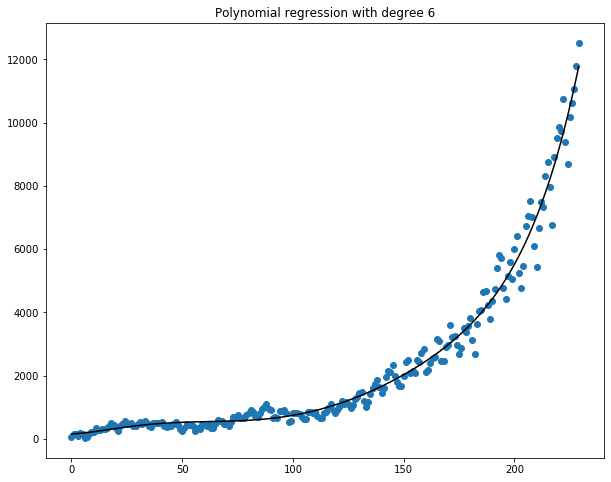

In [103]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(6))
plt.show()

In [104]:
polynom.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']

In [105]:
polynom.get_params(deep=True)

{'degree': 6, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

## Regression Evaluation Metrics


Here are two most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n \frac{|y_i-\hat{y}_i|}{y_i}$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n \frac{(y_i-\hat{y}_i)^2}{y_i}} $$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [106]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [107]:
print("MAE using non linear regression = ",MAPE(df),"%")
print("RMSE using non linear regression = ",RMSPE(df),"%")

MAE using non linear regression =  0.19997584586886405 %
RMSE using non linear regression =  0.4986939452020245 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [108]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [109]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [110]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=polyreg.predict([[i]])
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [111]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,12115.452754,5.372915e+05
231,2020-11-15,12471.803287,5.497633e+05
232,2020-11-16,12840.324727,5.626036e+05
233,2020-11-17,13221.401018,5.758250e+05
234,2020-11-18,13615.425293,5.894404e+05
235,2020-11-19,14022.800012,6.034632e+05
236,2020-11-20,14443.937105,6.179071e+05
237,2020-11-21,14879.258112,6.327864e+05
238,2020-11-22,15329.194333,6.481156e+05


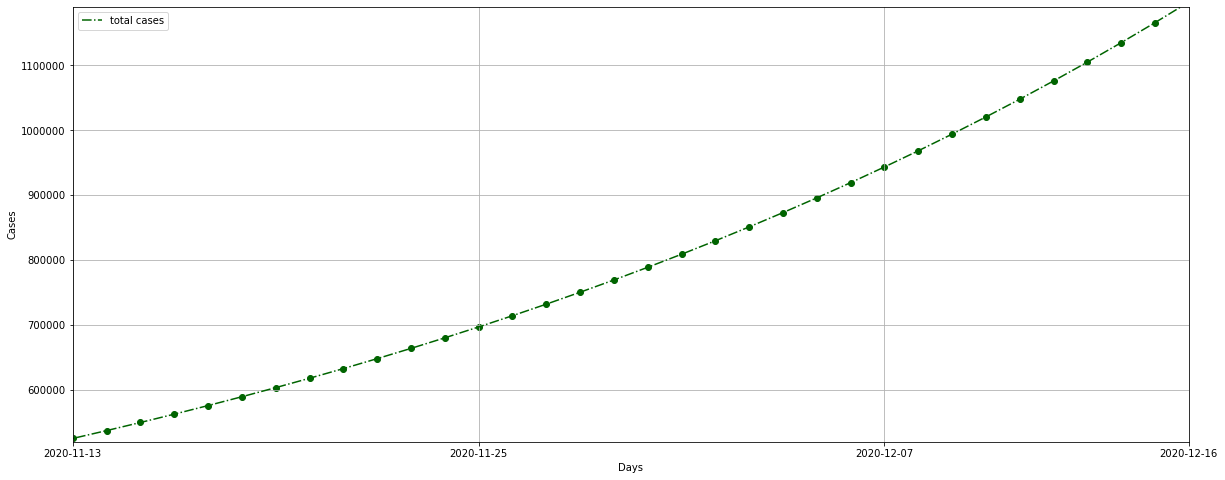

In [112]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,1190000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

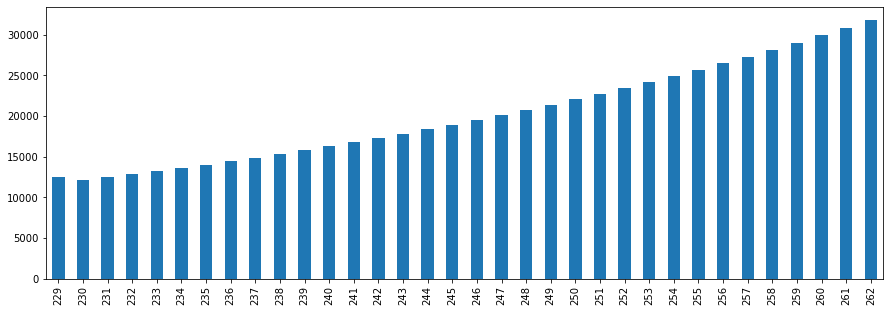

In [113]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

##### Small study of the efficieny of the prognosis against real world data

In [114]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(polyreg.predict([[i]])[0])
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,12840.324727,7.288810
233,2020-11-17,12496,13221.401018,5.805066
234,2020-11-18,13357,13615.425293,1.934756
235,2020-11-19,14575,14022.800012,3.788679
236,2020-11-20,14580,14443.937105,0.933216
237,2020-11-21,12079,14879.258112,23.182864
238,2020-11-22,10945,15329.194333,40.056595


In [115]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [116]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [117]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [118]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=polyreg.predict([[i]])
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [119]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,12115.452754,5.372915e+05
231,2020-11-15,12471.803287,5.497633e+05
232,2020-11-16,12840.324727,5.626036e+05
233,2020-11-17,13221.401018,5.758250e+05
234,2020-11-18,13615.425293,5.894404e+05
235,2020-11-19,14022.800012,6.034632e+05
236,2020-11-20,14443.937105,6.179071e+05
237,2020-11-21,14879.258112,6.327864e+05
238,2020-11-22,15329.194333,6.481156e+05


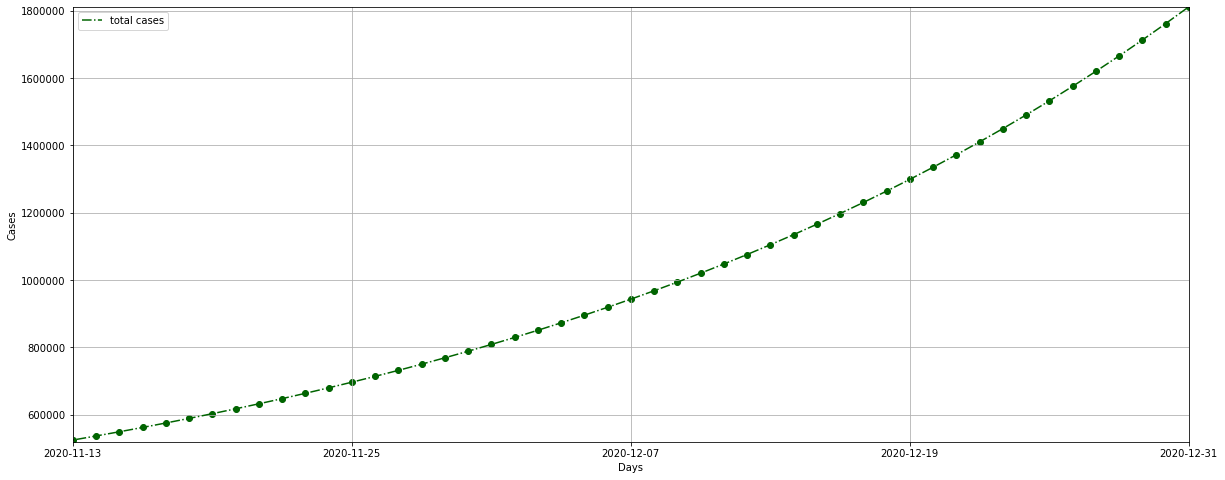

In [120]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1811000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

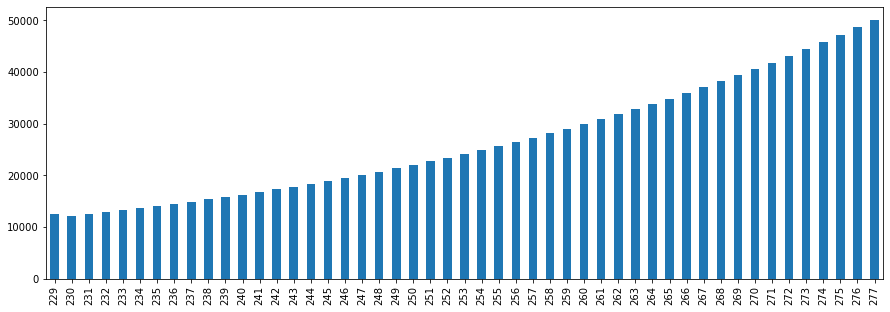

In [121]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [122]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Polynomial Regression (Non-Linear) using 'Day' as a feature and TOTAL CASES as a target

In [123]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

In [124]:
X = df[['Day']]
y = df['total_cases']

In [125]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)
    return s/len(df)

In [126]:
error=[]
for i in range(3,50):
    polynom = PolynomialFeatures(i)
    polyreg=make_pipeline(polynom,LinearRegression())
    polyreg.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  7


In [127]:
polynom = PolynomialFeatures(7)

In [128]:
polyreg=make_pipeline(polynom,LinearRegression())

In [129]:
polyreg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [130]:
X_seq = np.linspace(X.min(),X.max(),len(df)).reshape(-1,1)

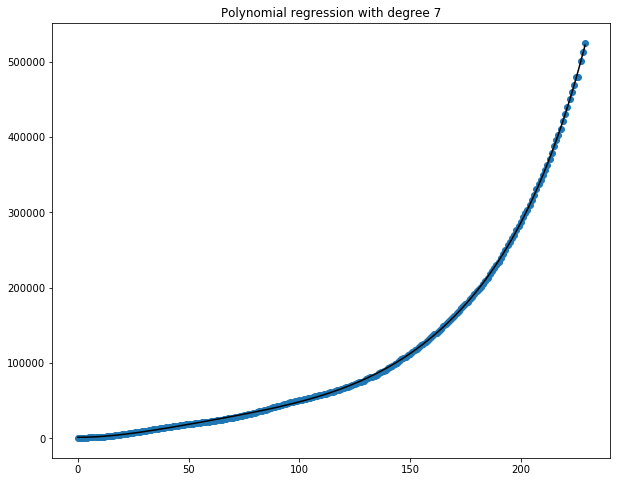

In [131]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(7))
plt.show()

In [132]:
polynom.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7']

In [133]:
polynom.get_params(deep=True)

{'degree': 7, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [134]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [135]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 0.05930714721362945 %
RMSE: 0.19350224825091553 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [136]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [137]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [138]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=polyreg.predict([[i]])
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [139]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,8347.239739,5.335232e+05
231,2020-11-15,11867.993668,5.453912e+05
232,2020-11-16,12180.609428,5.575718e+05
233,2020-11-17,12502.378645,5.700742e+05
234,2020-11-18,12833.553602,5.829078e+05
235,2020-11-19,13174.392019,5.960822e+05
236,2020-11-20,13525.157124,6.096073e+05
237,2020-11-21,13886.117739,6.234934e+05
238,2020-11-22,14257.548348,6.377510e+05


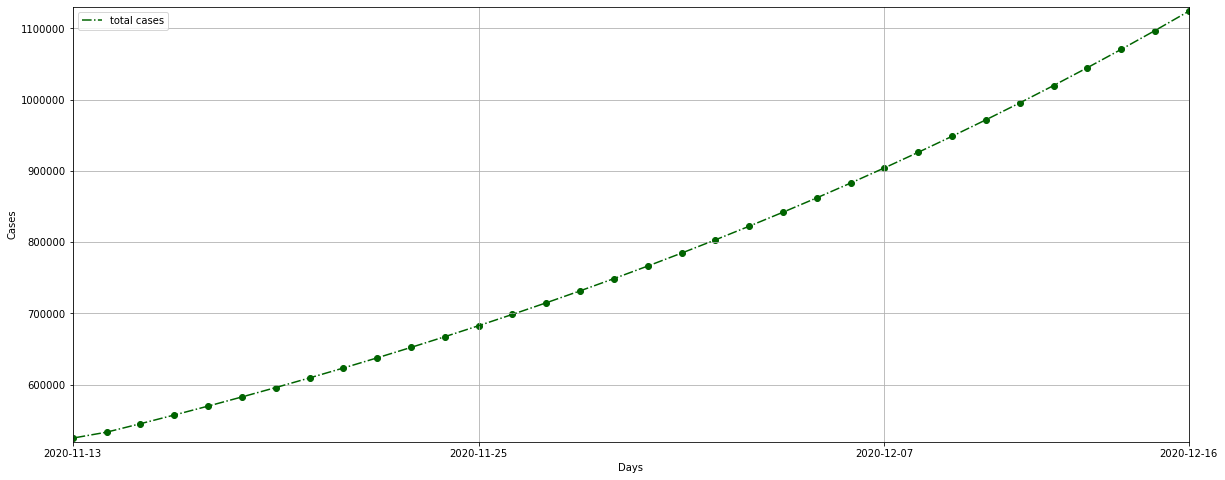

In [140]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,1130000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

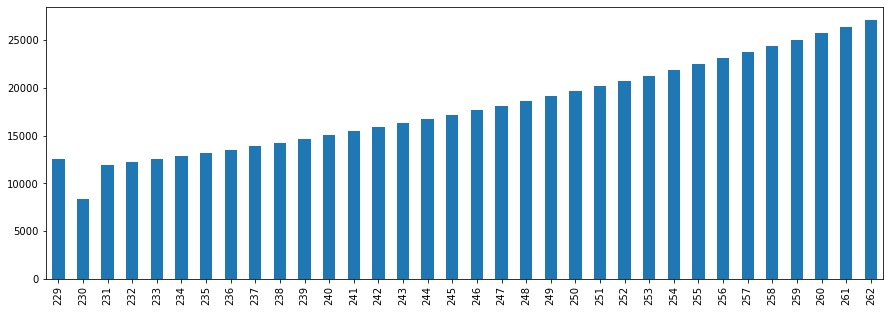

In [141]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

##### Small study of the efficieny of the prognosis against real world data

In [142]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(polyreg.predict([[i]])[0])
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,557571.842836,0.015271
233,2020-11-17,570153,570074.221481,0.013817
234,2020-11-18,583510,582907.775083,0.103207
235,2020-11-19,598085,596082.167102,0.334874
236,2020-11-20,612665,609607.324227,0.499078
237,2020-11-21,624744,623493.441966,0.200171
238,2020-11-22,635689,637750.990314,0.324371


In [143]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [144]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [145]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [146]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=polyreg.predict([[i]])
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [147]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,8347.239739,5.335232e+05
231,2020-11-15,11867.993668,5.453912e+05
232,2020-11-16,12180.609428,5.575718e+05
233,2020-11-17,12502.378645,5.700742e+05
234,2020-11-18,12833.553602,5.829078e+05
235,2020-11-19,13174.392019,5.960822e+05
236,2020-11-20,13525.157124,6.096073e+05
237,2020-11-21,13886.117739,6.234934e+05
238,2020-11-22,14257.548348,6.377510e+05


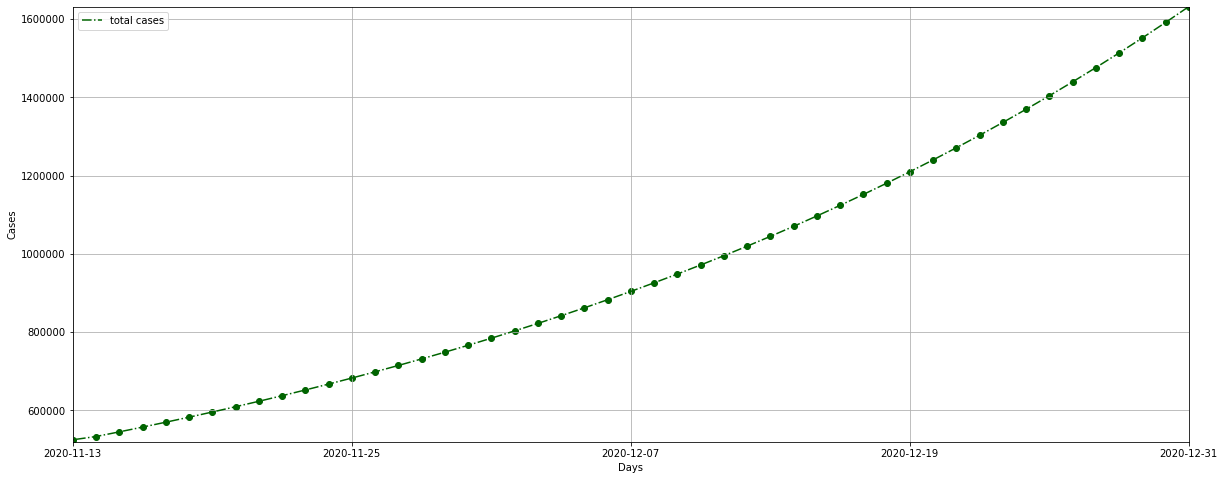

In [148]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1631000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

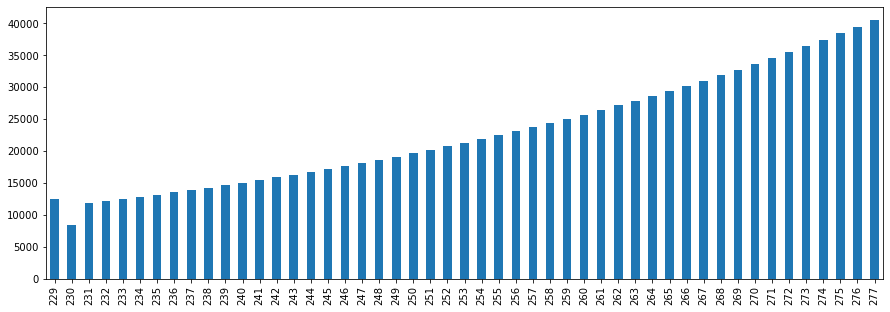

In [149]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [150]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

## Section 5

#### Lasso Regression using 'Day' as a feature and NEW CASES as a target

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge.

The optimization objective for Lasso is:

$$(1 / (2 * n_{samples})) * ||y - Xw||^2_2 + alpha * ||w||_1$$
Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0 (no L2 penalty).

In [151]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

In [152]:
X = df[['Day']]
y = df['new_cases']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [154]:
from sklearn.linear_model import Lasso

In [155]:
lr = Lasso()

In [156]:
lr.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [157]:
predictions = lr.predict(X_test)

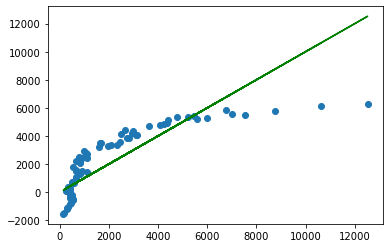

In [158]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [159]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lr.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lr.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

##### Model's Error.

In [160]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 1.7747584496465802 %
RMSE: 4.9170177331141405 %


Some of the predicted values are negative, let's verify it

The Lasso Regression fits the following equation: $$\hat{y} = ax + b$$
Where:
$$a= 34.41$$
$$b= -1614.07$$
$$x= Day$$
$$\hat{y}= prediction$$

In [161]:
print("The coefficient of the regression is:",lr.coef_[0])
print("The intercept of the regression is:",lr.intercept_)

The coefficient of the regression is: 34.41488346313827
The intercept of the regression is: -1614.0767568868796


In [162]:
print("The number of new cases in the day 0 are:",df['new_cases'][0])
print("The PREDICTED new cases in the day 0 are:",df['Day'][0]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 0 are: 62.0
The PREDICTED new cases in the day 0 are: -1614.0767568868796


In [163]:
print("The number of new cases in the day 5 are:",df['new_cases'][5])
print("The PREDICTED new cases in the day 5 are:",df['Day'][5]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 5 are: 153.0
The PREDICTED new cases in the day 5 are: -1442.0023395711883


In [164]:
print("The number of new cases in the day 10 are:",df['new_cases'][10])
print("The PREDICTED new cases in the day 10 are:",df['Day'][10]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 10 are: 224.0
The PREDICTED new cases in the day 10 are: -1269.927922255497


###### Prognosis from 14/11/2020 to 16/12/2020

In [165]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [166]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [167]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=lr.predict([[i]]) + 5600
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [168]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,525176.000000
230,2020-11-14,11901.346440,537077.346440
231,2020-11-15,11935.761323,549013.107763
232,2020-11-16,11970.176207,560983.283969
233,2020-11-17,12004.591090,572987.875059
234,2020-11-18,12039.005973,585026.881033
235,2020-11-19,12073.420857,597100.301890
236,2020-11-20,12107.835740,609208.137630
237,2020-11-21,12142.250624,621350.388254
238,2020-11-22,12176.665507,633527.053761


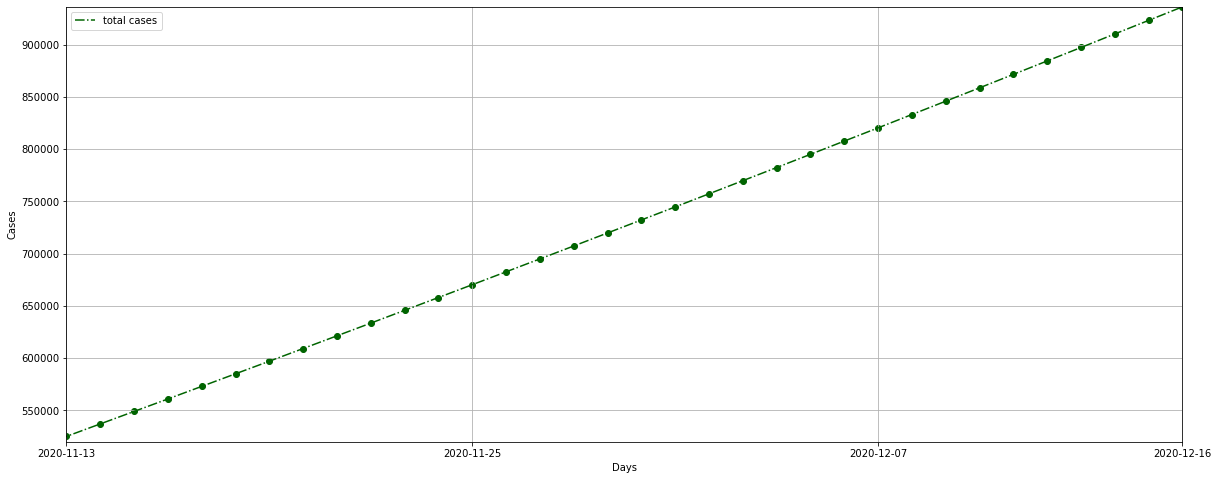

In [169]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,936000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

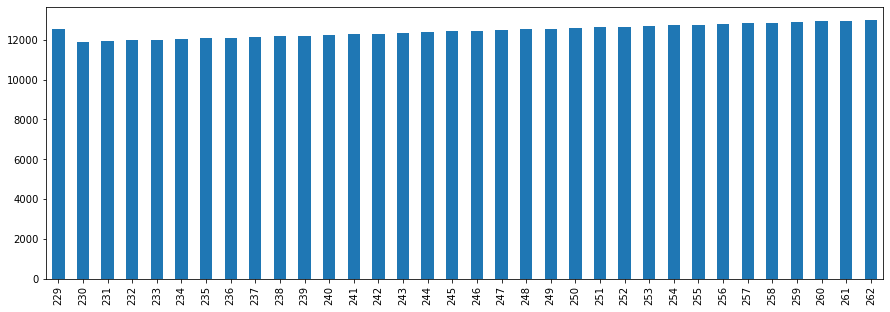

In [170]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [171]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficieny of the prognosis against real world data

In [172]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(lr.predict([[i]])[0]+5600)
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,11970.176207,0.018184
233,2020-11-17,12496,12004.591090,3.932530
234,2020-11-18,13357,12039.005973,9.867440
235,2020-11-19,14575,12073.420857,17.163493
236,2020-11-20,14580,12107.835740,16.955859
237,2020-11-21,12079,12142.250624,0.523641
238,2020-11-22,10945,12176.665507,11.253225


In [173]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [174]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [175]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [176]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=lr.predict([[i]]) + 5600
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [177]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,11901.346440,5.370773e+05
231,2020-11-15,11935.761323,5.490131e+05
232,2020-11-16,11970.176207,5.609833e+05
233,2020-11-17,12004.591090,5.729879e+05
234,2020-11-18,12039.005973,5.850269e+05
235,2020-11-19,12073.420857,5.971003e+05
236,2020-11-20,12107.835740,6.092081e+05
237,2020-11-21,12142.250624,6.213504e+05
238,2020-11-22,12176.665507,6.335271e+05


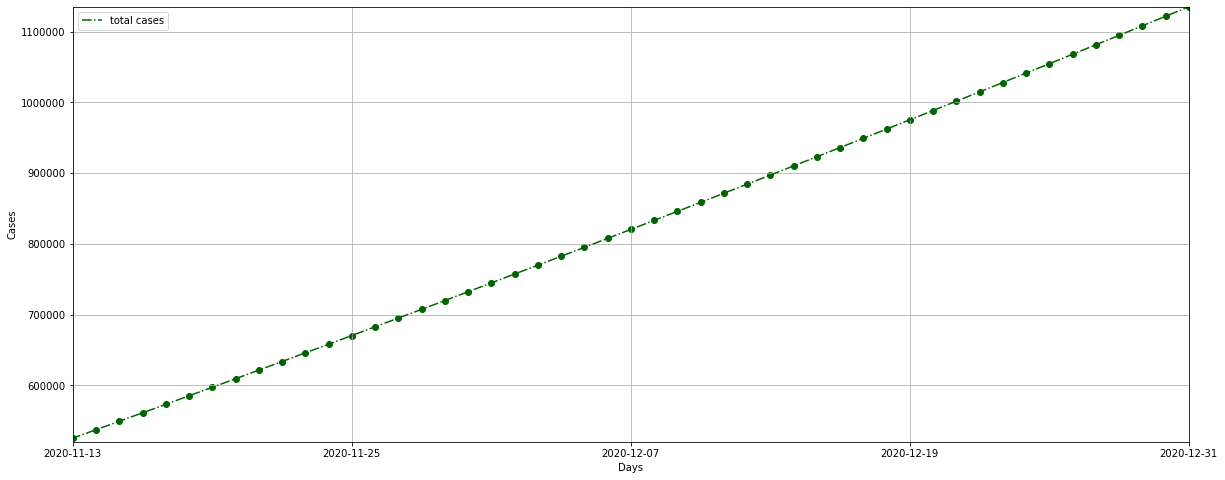

In [178]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1135000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

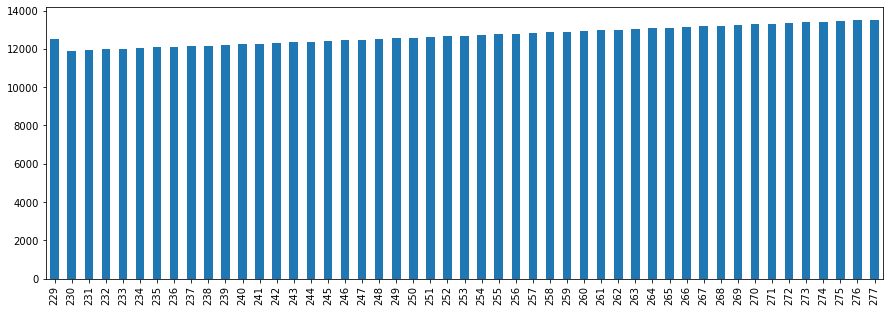

In [179]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [180]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Lasso Regression using 'Day' as a feature and TOTAL CASES as a target

In [181]:
X = df[['Day']]
y = df['total_cases']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [183]:
lr = Lasso()

In [184]:
lr.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [185]:
predictions = lr.predict(X_test)

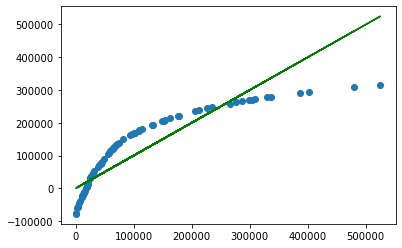

In [186]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [187]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lr.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lr.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [188]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 5.2341914321644705 %
RMSE: 19.294004056350147 %


Some of the predicted values are negative, let's verify it

The Lasso Regression fits the following equation: $$\hat{y} = ax + b$$
Where:
$$a= 1735.29$$
$$b= -81403.06$$
$$x= Day$$
$$\hat{y}= prediction$$

In [189]:
print("The coefficient of the regression is:",lr.coef_[0])
print("The intercept of the regression is:",lr.intercept_)

The coefficient of the regression is: 1735.2978904119645
The intercept of the regression is: -81403.06051532621


In [190]:
print("The number of new cases in the day 0 are:",df['new_cases'][0])
print("The PREDICTED new cases in the day 0 are:",df['Day'][0]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 0 are: 62.0
The PREDICTED new cases in the day 0 are: -81403.06051532621


In [191]:
print("The number of new cases in the day 5 are:",df['new_cases'][5])
print("The PREDICTED new cases in the day 5 are:",df['Day'][5]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 5 are: 153.0
The PREDICTED new cases in the day 5 are: -72726.5710632664


In [192]:
print("The number of new cases in the day 10 are:",df['new_cases'][10])
print("The PREDICTED new cases in the day 10 are:",df['Day'][10]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 10 are: 224.0
The PREDICTED new cases in the day 10 are: -64050.081611206566


###### Prognosis from 14/11/2020 to 16/12/2020

In [193]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [194]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [195]:
df.at[230,'new_cases']=10681
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=lr.predict([[i]]) + 205824 + 9802
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [196]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,533341.454279
231,2020-11-15,535076.752170
232,2020-11-16,536812.050060
233,2020-11-17,538547.347951
234,2020-11-18,540282.645841
235,2020-11-19,542017.943731
236,2020-11-20,543753.241622
237,2020-11-21,545488.539512
238,2020-11-22,547223.837403


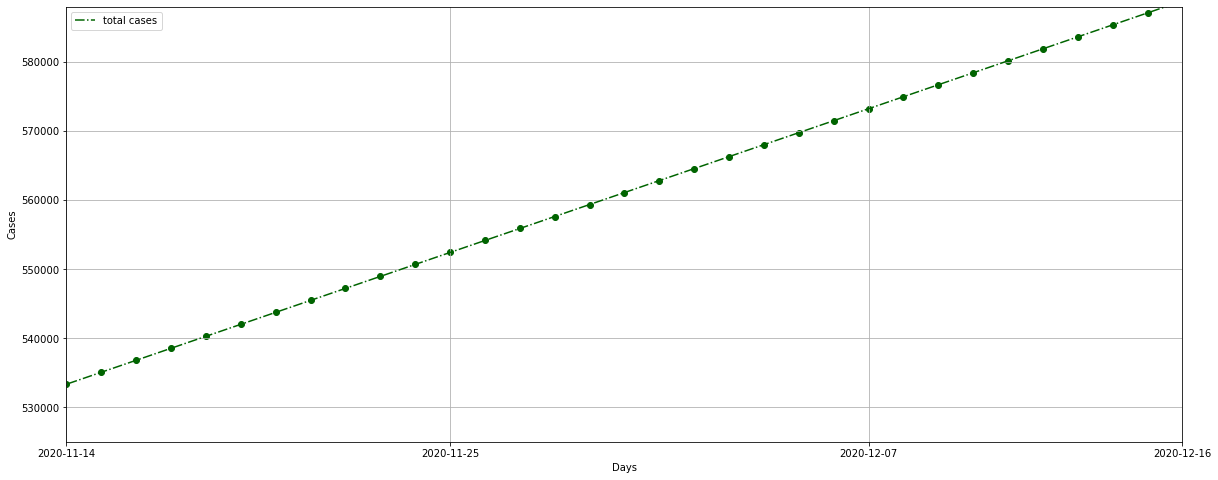

In [197]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-14','2020-12-16')
ax.set_ylim(525000,588000)

ax.set_xticks(['2020-11-14','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

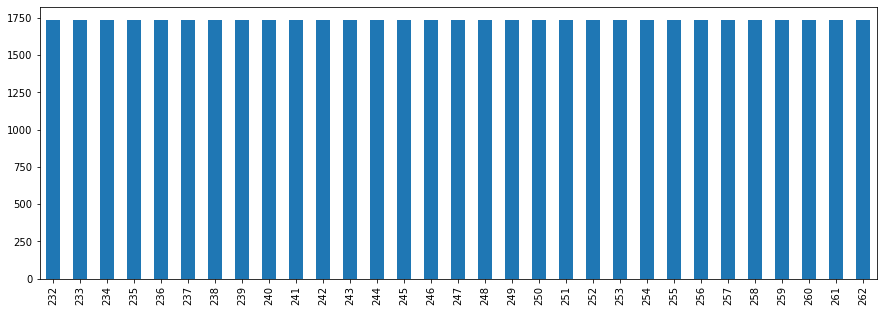

In [198]:
df['new_cases'][232:].plot.bar(figsize=(15,5))

In [199]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [200]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(lm.predict([[i]])[0]+ 205824 + 9802)
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,529771.714484,5.000437
233,2020-11-17,570153,531459.001815,6.786599
234,2020-11-18,583510,533146.289145,8.631165
235,2020-11-19,598085,534833.576476,10.575658
236,2020-11-20,612665,536520.863807,12.428348
237,2020-11-21,624744,538208.151137,13.851409
238,2020-11-22,635689,539895.438468,15.069250


In [201]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [202]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [203]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [204]:
df.at[230,'new_cases']=10681
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=lr.predict([[i]]) + 205824 + 9802
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [205]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,533341.454279
231,2020-11-15,535076.752170
232,2020-11-16,536812.050060
233,2020-11-17,538547.347951
234,2020-11-18,540282.645841
235,2020-11-19,542017.943731
236,2020-11-20,543753.241622
237,2020-11-21,545488.539512
238,2020-11-22,547223.837403


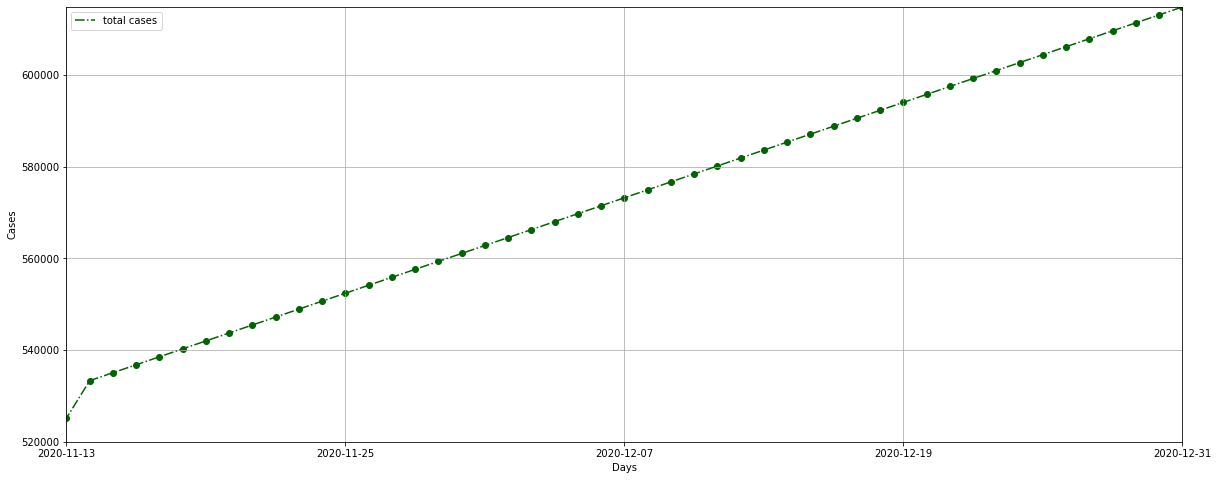

In [206]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,614900)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

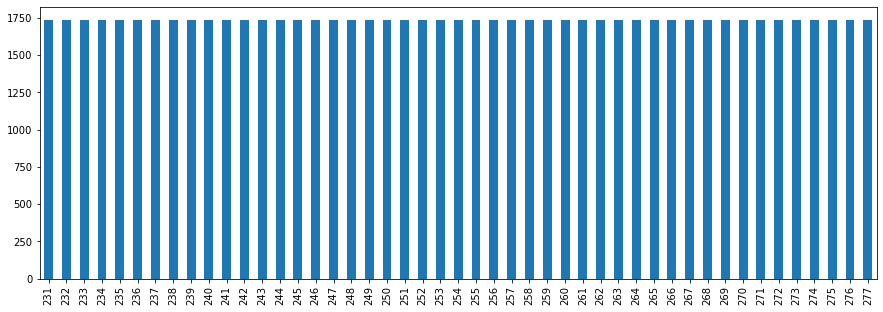

In [207]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [208]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

## Section 6

#### Ridge Regression using 'Day' as a feature and NEW CASES as a target

Ridge regression uses a type of shrinkage estimator called a ridge estimator. Shrinkage estimators theoretically produce new estimators that are shrunk closer to the “true” population parameters. The ridge estimator is especially good at improving the least-squares estimate when multicollinearity is present.

Ridge regression belongs a class of regression tools that use L2 regularization. The other type of regularization, L1 regularization, limits the size of the coefficients by adding an L1 penalty equal to the absolute value of the magnitude of coefficients. This sometimes results in the elimination of some coefficients altogether, which can yield sparse models. L2 regularization adds an L2 penalty, which equals the square of the magnitude of coefficients. All coefficients are shrunk by the same factor (so none are eliminated). Unlike L1 regularization, L2 will not result in sparse models.

A tuning parameter (λ) controls the strength of the penalty term. When λ = 0, ridge regression equals least squares regression. If λ = ∞, all coefficients are shrunk to zero. The ideal penalty is therefore somewhere in between 0 and ∞.

In the simplest case, the problem of a near-singular moment matrix $$ (\mathbf {X} ^{\mathsf {T}}\mathbf {X} )$$ is alleviated by adding positive elements to the diagonals, thereby decreasing its condition number. Analogous to the ordinary least squares estimator, the simple ridge estimator is then given by

$$ {\hat {\beta }}_{R}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} +\lambda \mathbf {I} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y} $$ 
where <b>y</b> is the regressand, <b>X</b>  is the design matrix, <b>I</b>  is the identity matrix, and the ridge parameter  \lambda \geq 0 serves as the constant shifting the diagonals of the moment matrix. It can be shown that this estimator is the solution to the least squares problem subject to the constraint $$ \beta ^{\mathsf {T}}\beta =c $$ , which can be expressed as a Lagrangian:

$$ \min _{\beta }\,(\mathbf {y} -\mathbf {X} \beta )^{\mathsf {T}}(\mathbf {y} -\mathbf {X} \beta )+\lambda (\beta ^{\mathsf {T}}\beta -c)$$
which shows that λ is nothing but the Lagrange multiplier of the constraint. In the case of  λ=0, in which the constraint is non-binding, the ridge estimator reduces to ordinary least squares.
<br>Minimizes the objective function:

$$||y - Xw||^2_2 + alpha * ||w||^2_2 $$

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [209]:
df.at[228,'new_cases']=4766

In [210]:
X = df[['Day']]
y = df['new_cases']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [212]:
from sklearn.linear_model import Ridge

In [213]:
rr = Ridge()

In [214]:
rr.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [215]:
predictions = rr.predict(X_test)

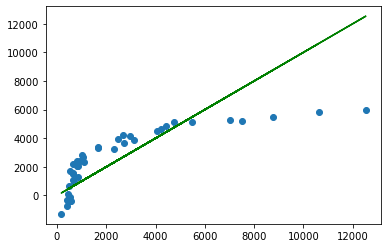

In [216]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [217]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = rr.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = rr.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [218]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 1.6028172259654343 %
RMSE: 4.318117325646377 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [219]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [220]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [221]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=rr.predict([[i]])+5500
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [222]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,525176.000000
230,2020-11-14,11475.422454,536651.422454
231,2020-11-15,11507.562474,548158.984928
232,2020-11-16,11539.702494,559698.687422
233,2020-11-17,11571.842514,571270.529936
234,2020-11-18,11603.982534,582874.512471
235,2020-11-19,11636.122555,594510.635025
236,2020-11-20,11668.262575,606178.897600
237,2020-11-21,11700.402595,617879.300195
238,2020-11-22,11732.542615,629611.842810


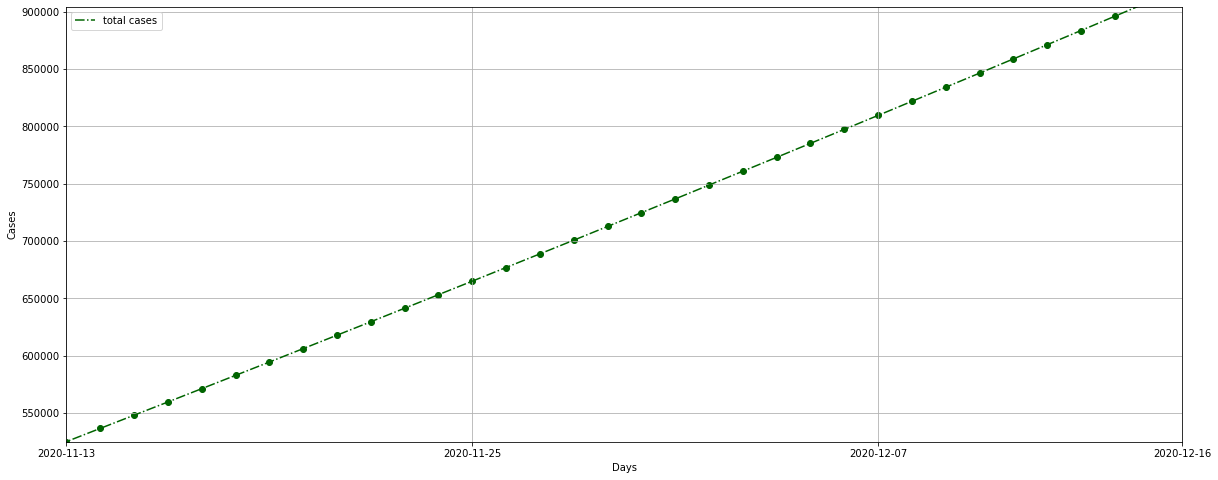

In [223]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(525000,904000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

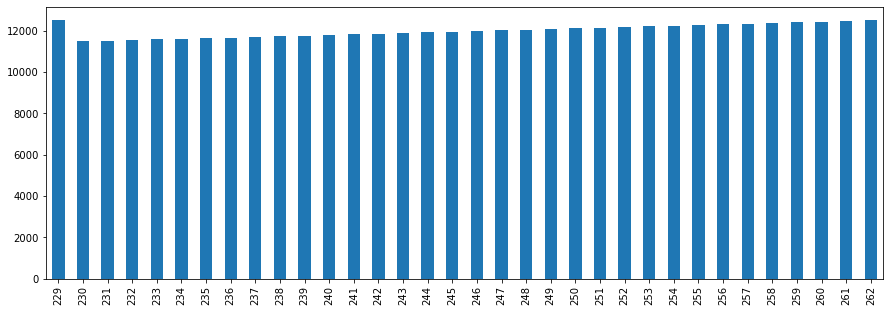

In [224]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [225]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [226]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(rr.predict([[i]])[0]+5500)
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,11539.702494,3.578689
233,2020-11-17,12496,11571.842514,7.395626
234,2020-11-18,13357,11603.982534,13.124335
235,2020-11-19,14575,11636.122555,20.163825
236,2020-11-20,14580,11668.262575,19.970764
237,2020-11-21,12079,11700.402595,3.134344
238,2020-11-22,10945,11732.542615,7.195456


In [227]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [228]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [229]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [230]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=rr.predict([[i]])+5500
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [231]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,11475.422454,5.366514e+05
231,2020-11-15,11507.562474,5.481590e+05
232,2020-11-16,11539.702494,5.596987e+05
233,2020-11-17,11571.842514,5.712705e+05
234,2020-11-18,11603.982534,5.828745e+05
235,2020-11-19,11636.122555,5.945106e+05
236,2020-11-20,11668.262575,6.061789e+05
237,2020-11-21,11700.402595,6.178793e+05
238,2020-11-22,11732.542615,6.296118e+05


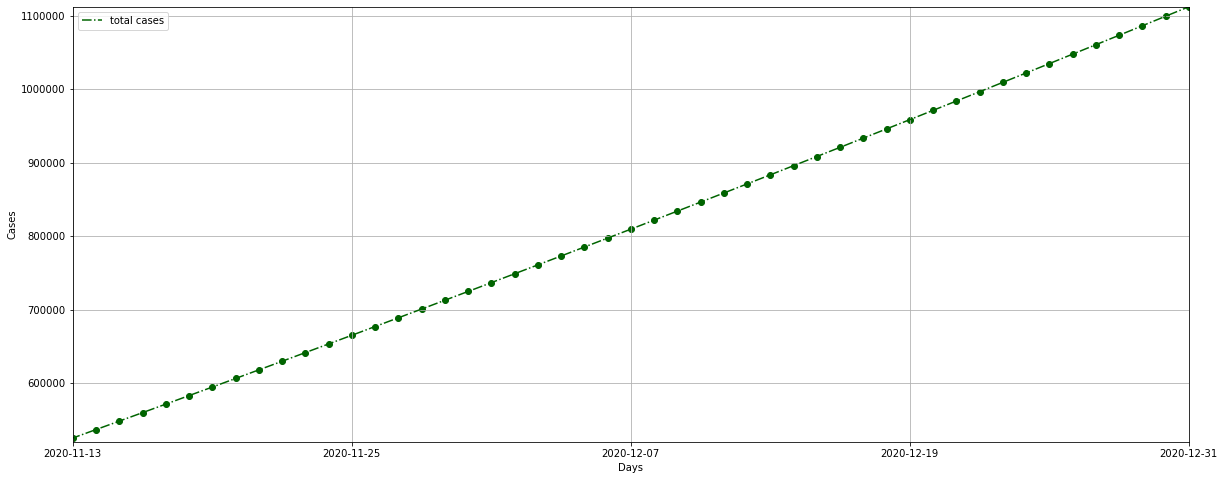

In [232]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1112000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

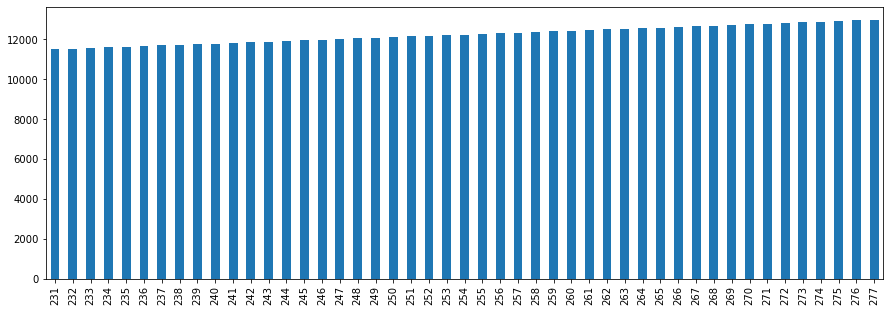

In [233]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [234]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Ridge Regression using 'Day' as a feature and TOTAL CASES as a target

In [235]:
X = df[['Day']]
y = df['total_cases']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [237]:
from sklearn.linear_model import Ridge

In [238]:
rr = Ridge()

In [239]:
rr.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [240]:
predictions = rr.predict(X_test)

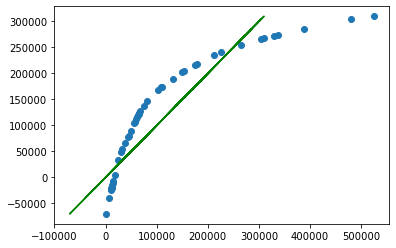

In [241]:
plt.scatter(y_test,predictions)
plt.plot(predictions,predictions,c='g')

In [242]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = rr.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = rr.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [243]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 4.947312977520477 %
RMSE: 18.23918325595266 %


Some of the predicted values are negative, let's verify it

The Lasso Regression fits the following equation: $$\hat{y} = ax + b$$
Where:
$$a= 1690.046$$
$$b= -77052.91$$
$$x= Day$$
$$\hat{y}= prediction$$

In [244]:
print("The coefficient of the regression is:",rr.coef_[0])
print("The intercept of the regression is:",rr.intercept_)

The coefficient of the regression is: 1690.046756249444
The intercept of the regression is: -77052.9186777562


In [245]:
print("The number of new cases in the day 0 are:",df['new_cases'][0])
print("The PREDICTED new cases in the day 0 are:",df['Day'][0]*rr.coef_[0] + rr.intercept_)

The number of new cases in the day 0 are: 62.0
The PREDICTED new cases in the day 0 are: -77052.9186777562


In [246]:
print("The number of new cases in the day 5 are:",df['new_cases'][5])
print("The PREDICTED new cases in the day 5 are:",df['Day'][5]*rr.coef_[0] + rr.intercept_)

The number of new cases in the day 5 are: 153.0
The PREDICTED new cases in the day 5 are: -68602.68489650897


In [247]:
print("The number of new cases in the day 10 are:",df['new_cases'][10])
print("The PREDICTED new cases in the day 10 are:",df['Day'][10]*rr.coef_[0] + rr.intercept_)

The number of new cases in the day 10 are: 224.0
The PREDICTED new cases in the day 10 are: -60152.45111526176


In [248]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

###### Prognosis from 14/11/2020 to 16/12/2020

In [249]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [250]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [251]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=rr.predict([[i]]) + 226052
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [252]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537709.835260
231,2020-11-15,539399.882016
232,2020-11-16,541089.928772
233,2020-11-17,542779.975528
234,2020-11-18,544470.022285
235,2020-11-19,546160.069041
236,2020-11-20,547850.115797
237,2020-11-21,549540.162553
238,2020-11-22,551230.209310


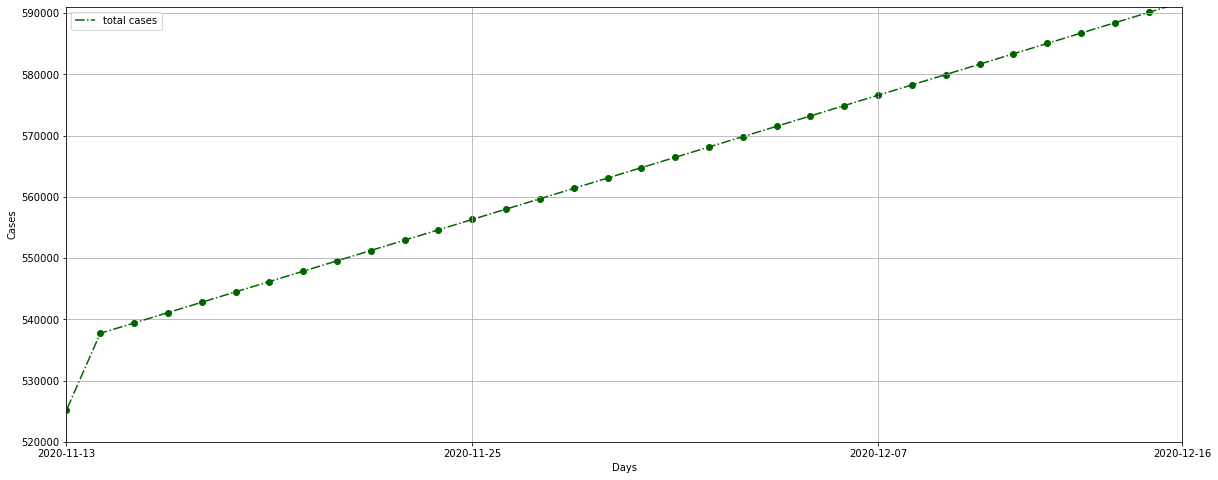

In [253]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,591000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

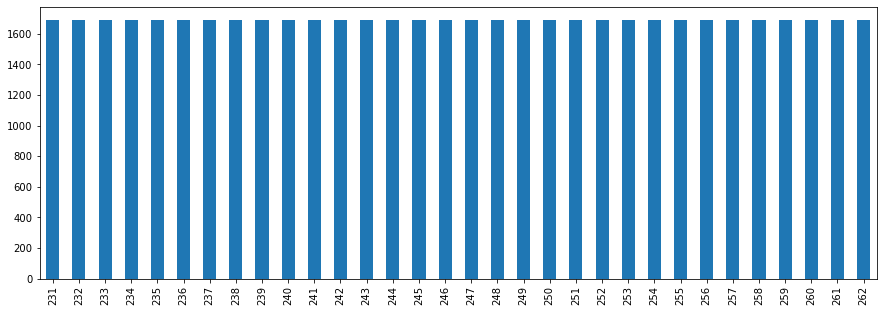

In [254]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [255]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [256]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(rr.predict([[i]])[0]+226052)
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,541089.928772,2.970835
233,2020-11-17,570153,542779.975528,4.800996
234,2020-11-18,583510,544470.022285,6.690541
235,2020-11-19,598085,546160.069041,8.681865
236,2020-11-20,612665,547850.115797,10.579172
237,2020-11-21,624744,549540.162553,12.037545
238,2020-11-22,635689,551230.209310,13.286181


In [257]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [258]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [259]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [260]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=rr.predict([[i]]) + 226052
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [261]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537709.835260
231,2020-11-15,539399.882016
232,2020-11-16,541089.928772
233,2020-11-17,542779.975528
234,2020-11-18,544470.022285
235,2020-11-19,546160.069041
236,2020-11-20,547850.115797
237,2020-11-21,549540.162553
238,2020-11-22,551230.209310


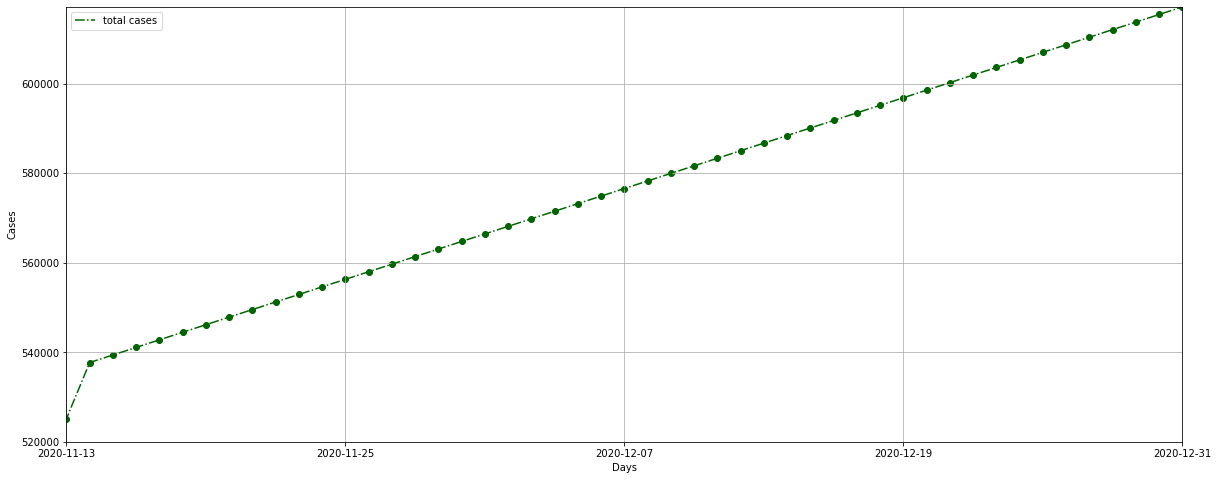

In [262]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,617142)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

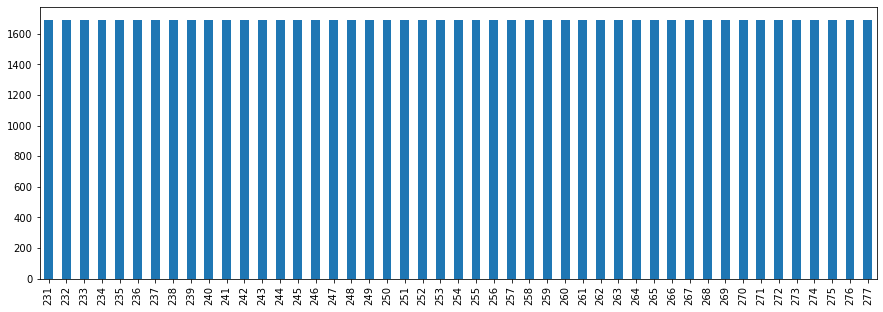

In [263]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [264]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

## Section 7

#### Kernel ridge regression using 'Day' as a feature and NEW CASES as a target

Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

The form of the model learned by KRR is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared error loss while support vector regression uses epsilon-insensitive loss, both combined with l2 regularization. In contrast to SVR, fitting a KRR model can be done in closed-form and is typically faster for medium-sized datasets. On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for epsilon > 0, at prediction-time.
The solution can be written in closed form as:

$$α=(K+τI)^{−1} y$$
where K is the kernel matrix and α is the vector of weights in the space induced by the kernel. The learned function can then be evaluated as $$f(x)=\sum_{i=1}^n α_i k(x,xi)$$.

In [265]:
X = df[['Day']]
y = df['new_cases']

In [266]:
from sklearn.kernel_ridge import KernelRidge

In [267]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)
    return s/len(df)

In [268]:
error=[]
for i in range(3,50):
    krr = KernelRidge(degree=i)
    krr.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  3


In [269]:
krr = KernelRidge(degree=3)

In [270]:
krr.fit(X,y)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [271]:
X_seq = np.linspace(X.min(),X.max(),len(df)).reshape(-1,1)

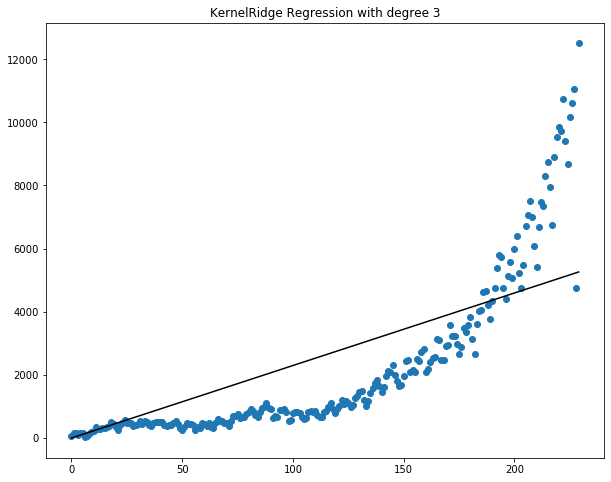

In [272]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_seq,krr.predict(X_seq),color="black")
plt.title("KernelRidge Regression with degree "+str(3))
plt.show()

In [273]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [274]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 1.0369789396015396 %
RMSE: 1.3712557702720034 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [275]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [276]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [277]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=krr.predict([[i]]) + 6000
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [278]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,525176.000000
230,2020-11-14,11283.948798,536459.948798
231,2020-11-15,11306.922489,547766.871287
232,2020-11-16,11329.896179,559096.767466
233,2020-11-17,11352.869870,570449.637336
234,2020-11-18,11375.843560,581825.480896
235,2020-11-19,11398.817251,593224.298147
236,2020-11-20,11421.790941,604646.089088
237,2020-11-21,11444.764631,616090.853719
238,2020-11-22,11467.738322,627558.592041


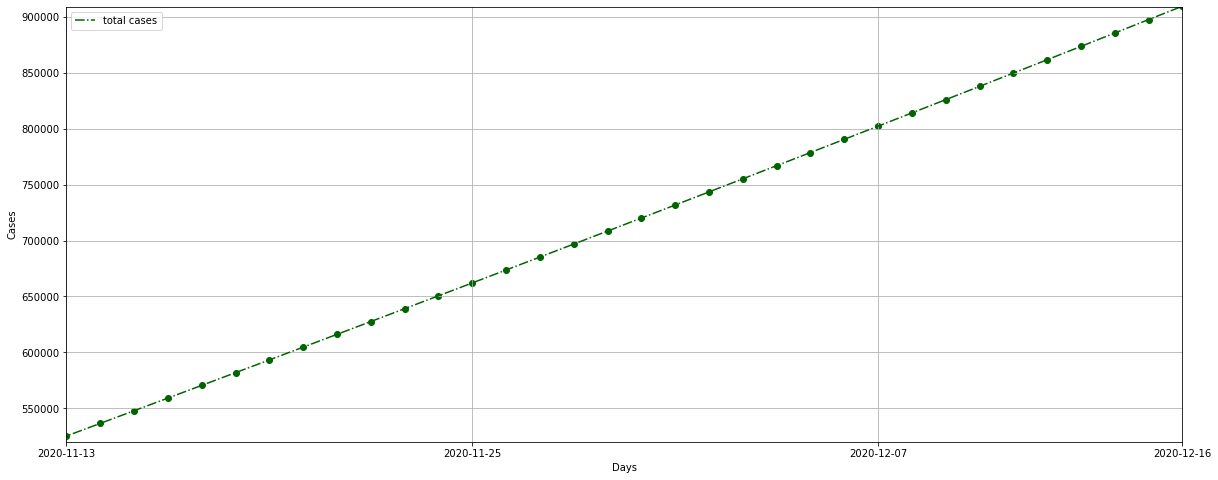

In [279]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,909000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

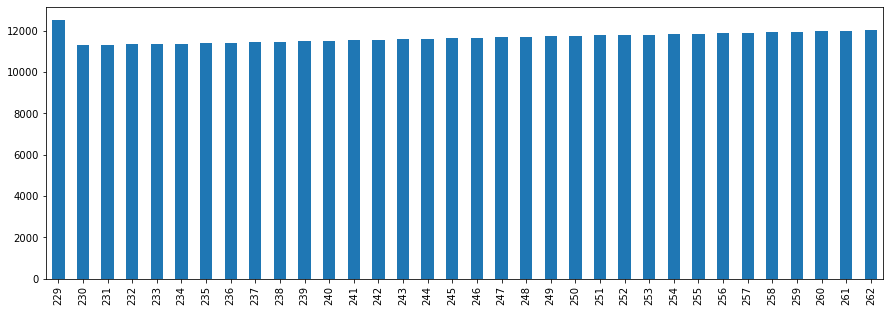

In [280]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [281]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficieny of the prognosis against real world data

In [282]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(krr.predict([[i]])[0]+6000)
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,11329.896179,5.331750
233,2020-11-17,12496,11352.869870,9.147968
234,2020-11-18,13357,11375.843560,14.832346
235,2020-11-19,14575,11398.817251,21.791991
236,2020-11-20,14580,11421.790941,21.661242
237,2020-11-21,12079,11444.764631,5.250727
238,2020-11-22,10945,11467.738322,4.776047


In [283]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [284]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [285]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [286]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=krr.predict([[i]]) + 6000
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [287]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,11283.948798,5.364599e+05
231,2020-11-15,11306.922489,5.477669e+05
232,2020-11-16,11329.896179,5.590968e+05
233,2020-11-17,11352.869870,5.704496e+05
234,2020-11-18,11375.843560,5.818255e+05
235,2020-11-19,11398.817251,5.932243e+05
236,2020-11-20,11421.790941,6.046461e+05
237,2020-11-21,11444.764631,6.160909e+05
238,2020-11-22,11467.738322,6.275586e+05


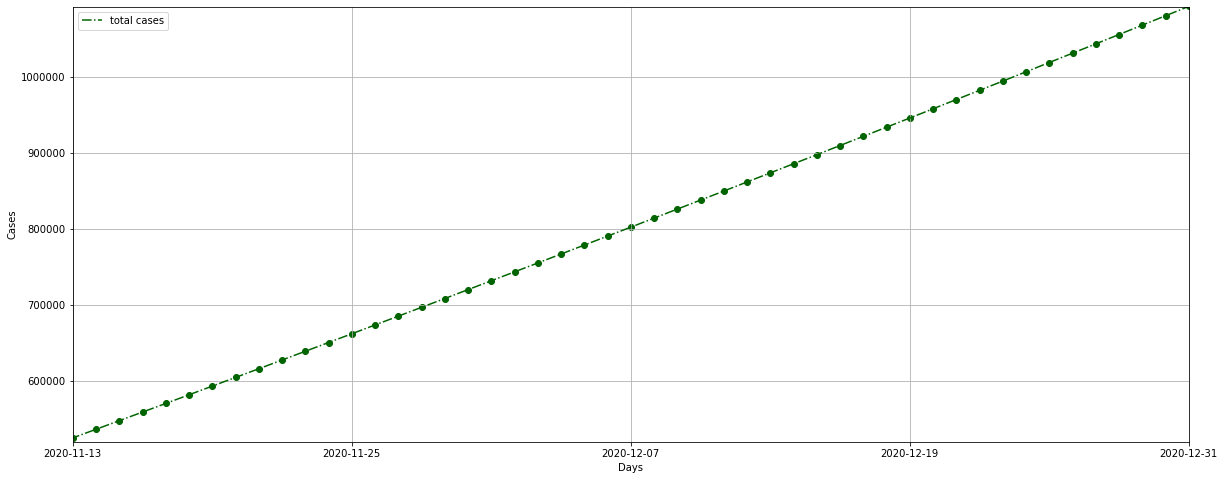

In [288]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1092000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

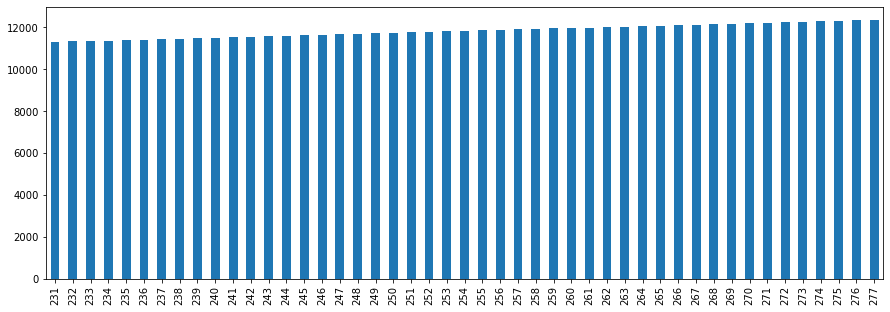

In [289]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [290]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Kernel ridge regression using 'Day' as a feature and TOTAL CASES as a target

In [291]:
X = df[['Day']]
y = df['total_cases']

In [292]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)
    return s/len(df)

In [293]:
error=[]
for i in range(3,50):
    krr = KernelRidge(degree=i)
    krr.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  3


In [294]:
krr = KernelRidge(degree=3)

In [295]:
krr.fit(X,y)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [296]:
X_seq = np.linspace(X.min(),X.max(),len(df)).reshape(-1,1)

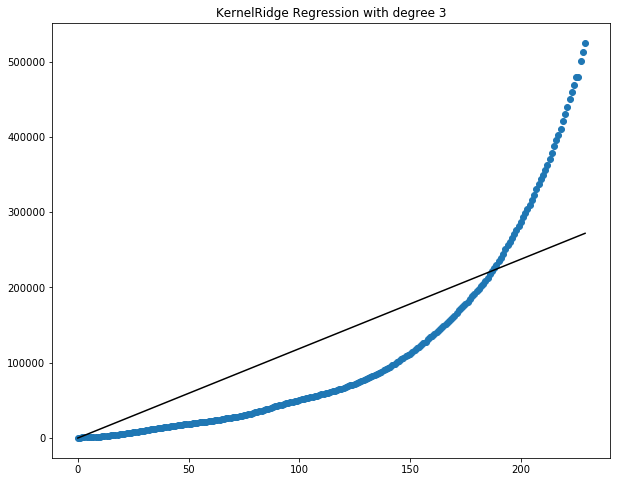

In [297]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_seq,krr.predict(X_seq),color="black")
plt.title("KernelRidge Regression with degree "+str(3))
plt.show()

In [298]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [299]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 1.3865918386319875 %
RMSE: 1.8297968564247493 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [300]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [301]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [302]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=krr.predict([[i]])+264569
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [303]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537699.863007
231,2020-11-15,538887.388493
232,2020-11-16,540074.913996
233,2020-11-17,541262.439479
234,2020-11-18,542449.964969
235,2020-11-19,543637.490466
236,2020-11-20,544825.015951
237,2020-11-21,546012.541441
238,2020-11-22,547200.066935


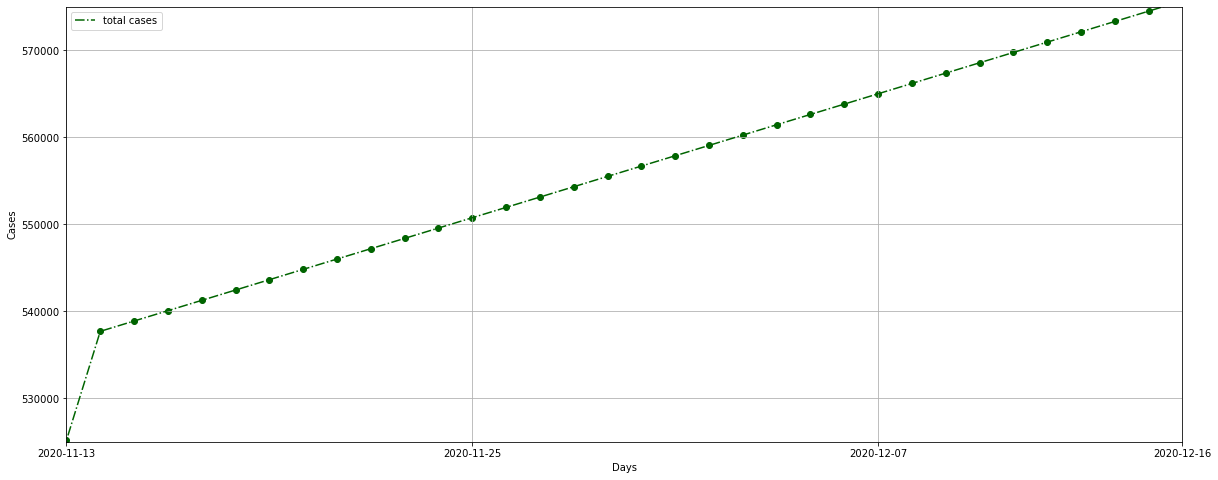

In [304]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(525000,575000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

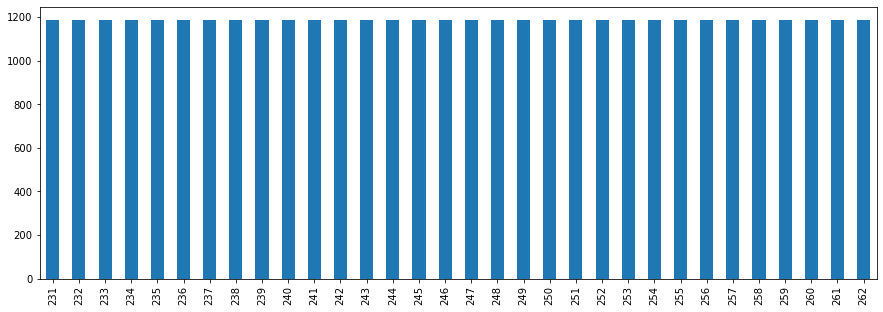

In [305]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [306]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [307]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(krr.predict([[i]])[0]+264569)
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,540074.913996,3.152850
233,2020-11-17,570153,541262.439479,5.067159
234,2020-11-18,583510,542449.964969,7.036732
235,2020-11-19,598085,543637.490466,9.103641
236,2020-11-20,612665,544825.015951,11.072933
237,2020-11-21,624744,546012.541441,12.602195
238,2020-11-22,635689,547200.066935,13.920161


In [308]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020


In [309]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [310]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [311]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=krr.predict([[i]])+264569
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [312]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537699.863007
231,2020-11-15,538887.388493
232,2020-11-16,540074.913996
233,2020-11-17,541262.439479
234,2020-11-18,542449.964969
235,2020-11-19,543637.490466
236,2020-11-20,544825.015951
237,2020-11-21,546012.541441
238,2020-11-22,547200.066935


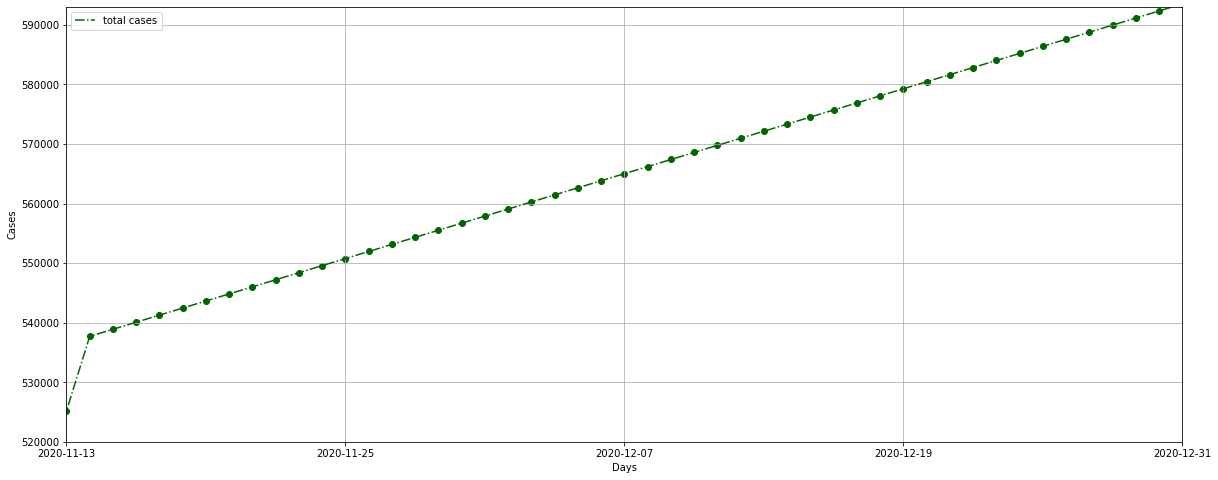

In [313]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,593000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

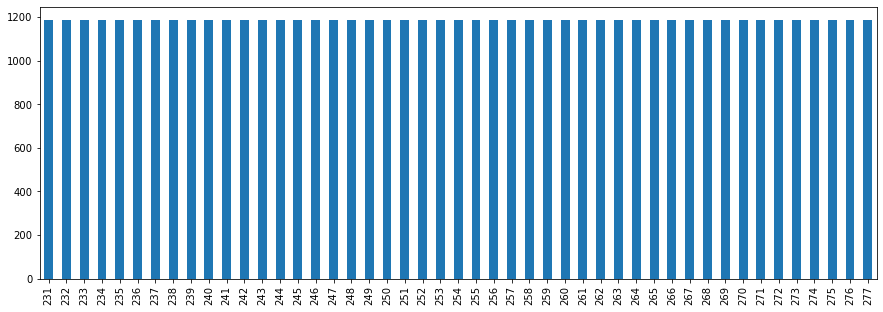

In [314]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [315]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

## Section 8

#### ElasticNet using 'Day' as a feature and NEW CASES as a target with alpha = 0.1

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

$$1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_{ratio} * ||w||_1 
+ 0.5 * alpha * (1 - l1_{ratio}) * ||w||^2_2$$
If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:

$$a * L1 + b * L2$$
where:

$$alpha = a + b$$ and $$l1_{ratio} = a / (a + b)$$
The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

In [316]:
from sklearn.linear_model import ElasticNet

In [317]:
X = df[['Day']]
y = df['new_cases']

In [318]:
en = ElasticNet(alpha=0.1)

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [320]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [321]:
predictions = en.predict(X_test)

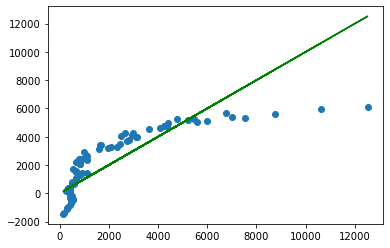

In [322]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [323]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))


##### Model's Error.

In [324]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 1.6929100848161325 %
RMSE: 4.656100640746101 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [325]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [326]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [327]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=en.predict([[i]]) + 5500
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [328]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,525176.000000
230,2020-11-14,11623.288633,536799.288633
231,2020-11-15,11656.554096,548455.842729
232,2020-11-16,11689.819560,560145.662289
233,2020-11-17,11723.085024,571868.747312
234,2020-11-18,11756.350487,583625.097799
235,2020-11-19,11789.615951,595414.713750
236,2020-11-20,11822.881415,607237.595165
237,2020-11-21,11856.146878,619093.742043
238,2020-11-22,11889.412342,630983.154385


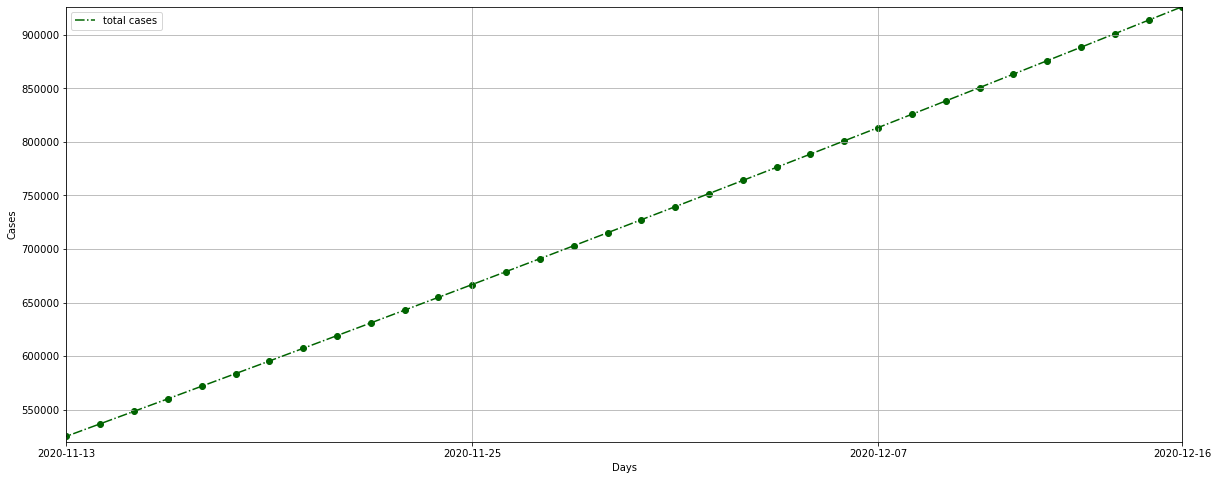

In [329]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,926000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

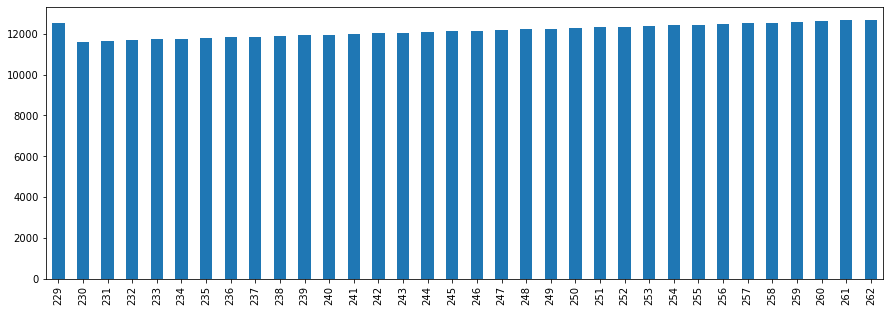

In [330]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [331]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [332]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(en.predict([[i]])[0]+5500)
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,11689.819560,2.324369
233,2020-11-17,12496,11723.085024,6.185299
234,2020-11-18,13357,11756.350487,11.983600
235,2020-11-19,14575,11789.615951,19.110697
236,2020-11-20,14580,11822.881415,18.910278
237,2020-11-21,12079,11856.146878,1.844963
238,2020-11-22,10945,11889.412342,8.628710


#### Prognosis from 13/11/2020 to 31/12/2020

In [333]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [334]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [335]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=en.predict([[i]]) + 5500
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [336]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,11623.288633,5.367993e+05
231,2020-11-15,11656.554096,5.484558e+05
232,2020-11-16,11689.819560,5.601457e+05
233,2020-11-17,11723.085024,5.718687e+05
234,2020-11-18,11756.350487,5.836251e+05
235,2020-11-19,11789.615951,5.954147e+05
236,2020-11-20,11822.881415,6.072376e+05
237,2020-11-21,11856.146878,6.190937e+05
238,2020-11-22,11889.412342,6.309832e+05


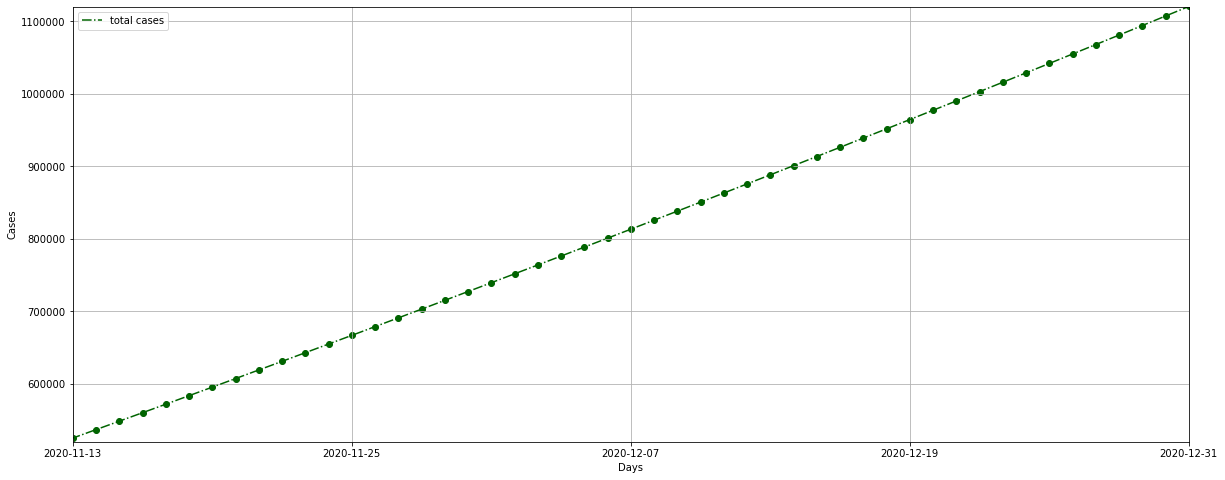

In [337]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1120000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

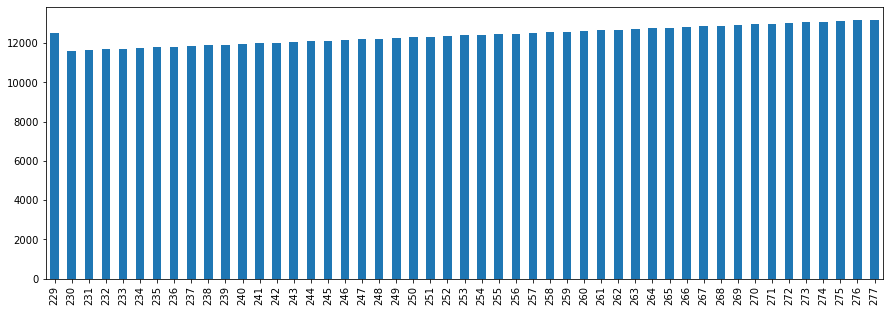

In [338]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [339]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### ElasticNet using 'Day' as a feature and NEW CASES as a target with alpha = 1

In [340]:
en = ElasticNet(alpha=1)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [342]:
en.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [343]:
predictions = en.predict(X_test)

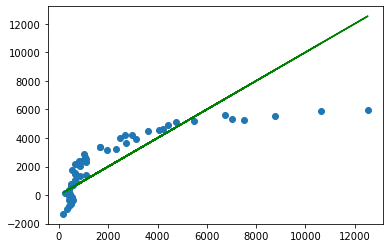

In [344]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [345]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [346]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 1.626632927995187 %
RMSE: 4.4139804450030855 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [347]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [348]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [349]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=en.predict([[i]]) + 5700
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [350]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,525176.000000
230,2020-11-14,11707.387785,536883.387785
231,2020-11-15,11739.803307,548623.191092
232,2020-11-16,11772.218828,560395.409920
233,2020-11-17,11804.634349,572200.044269
234,2020-11-18,11837.049870,584037.094139
235,2020-11-19,11869.465392,595906.559531
236,2020-11-20,11901.880913,607808.440444
237,2020-11-21,11934.296434,619742.736878
238,2020-11-22,11966.711955,631709.448833


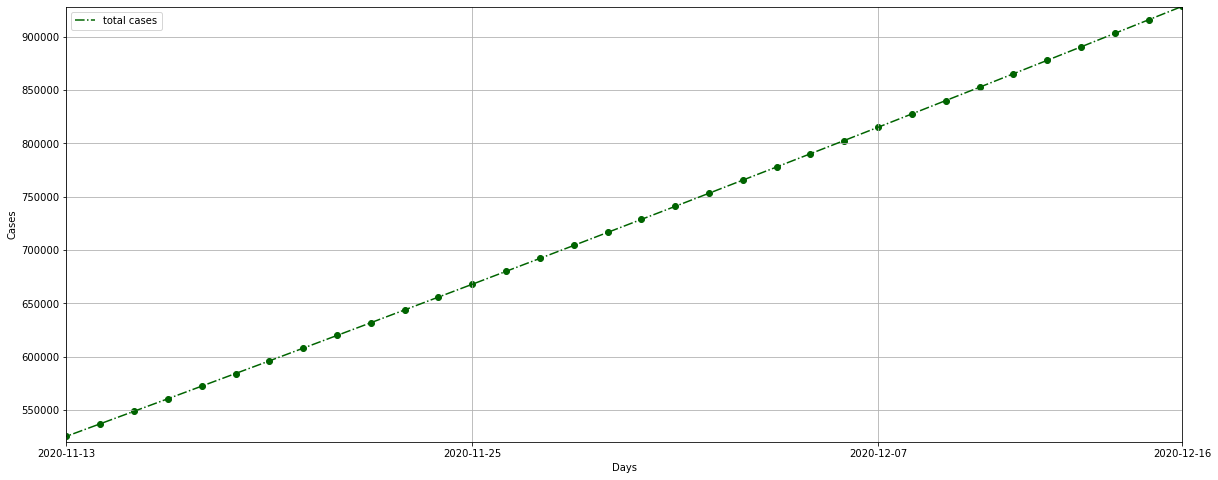

In [351]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,928000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

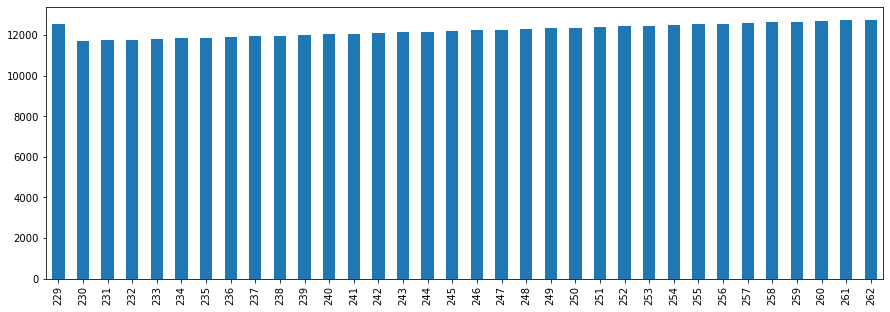

In [352]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [353]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficieny of the prognosis against real world data

In [354]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(en.predict([[i]])[0]+5700)
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,11772.218828,1.635872
233,2020-11-17,12496,11804.634349,5.532696
234,2020-11-18,13357,11837.049870,11.379427
235,2020-11-19,14575,11869.465392,18.562845
236,2020-11-20,14580,11901.880913,18.368444
237,2020-11-21,12079,11934.296434,1.197976
238,2020-11-22,10945,11966.711955,9.334965


In [355]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [356]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [357]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [358]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=en.predict([[i]]) + 5700
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [359]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,11707.387785,5.368834e+05
231,2020-11-15,11739.803307,5.486232e+05
232,2020-11-16,11772.218828,5.603954e+05
233,2020-11-17,11804.634349,5.722000e+05
234,2020-11-18,11837.049870,5.840371e+05
235,2020-11-19,11869.465392,5.959066e+05
236,2020-11-20,11901.880913,6.078084e+05
237,2020-11-21,11934.296434,6.197427e+05
238,2020-11-22,11966.711955,6.317094e+05


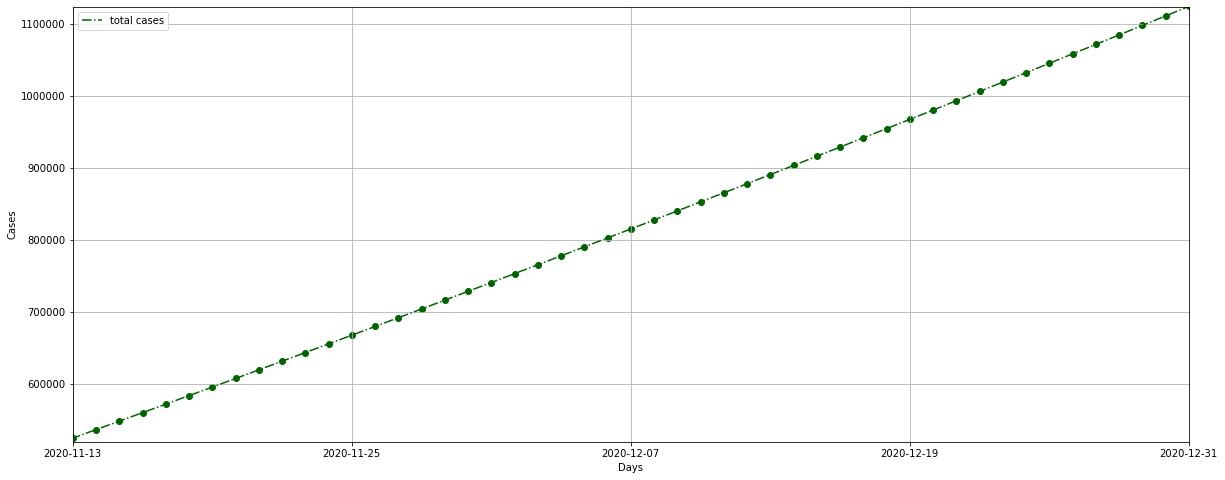

In [360]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1123000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

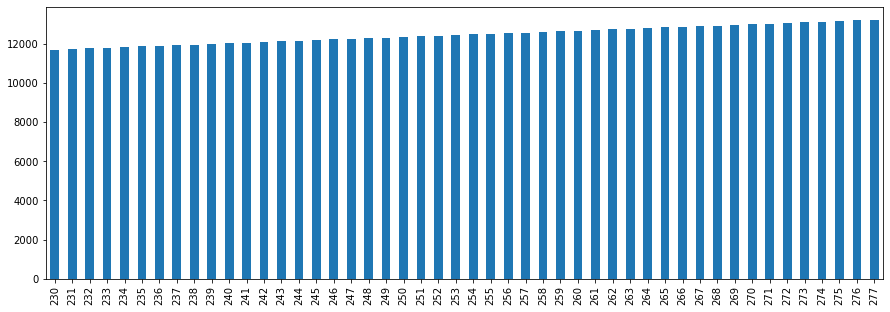

In [361]:
df['new_cases'][230:].plot.bar(figsize=(15,5))

In [362]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### ElasticNet using 'Day' as a feature and TOTAL CASES as a target with alpha = 0.1

In [363]:
X = df[['Day']]
y = df['total_cases']

In [364]:
en = ElasticNet(alpha=0.1)

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [366]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [367]:
predictions = en.predict(X_test)

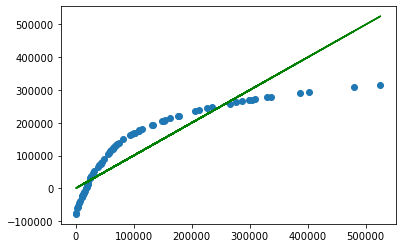

In [368]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [369]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [370]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 5.234046538324384 %
RMSE: 19.293469651772565 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [371]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [372]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [373]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=en.predict([[i]]) + 219964
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [374]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537677.252868
231,2020-11-15,539412.531657
232,2020-11-16,541147.810445
233,2020-11-17,542883.089234
234,2020-11-18,544618.368023
235,2020-11-19,546353.646812
236,2020-11-20,548088.925600
237,2020-11-21,549824.204389
238,2020-11-22,551559.483178


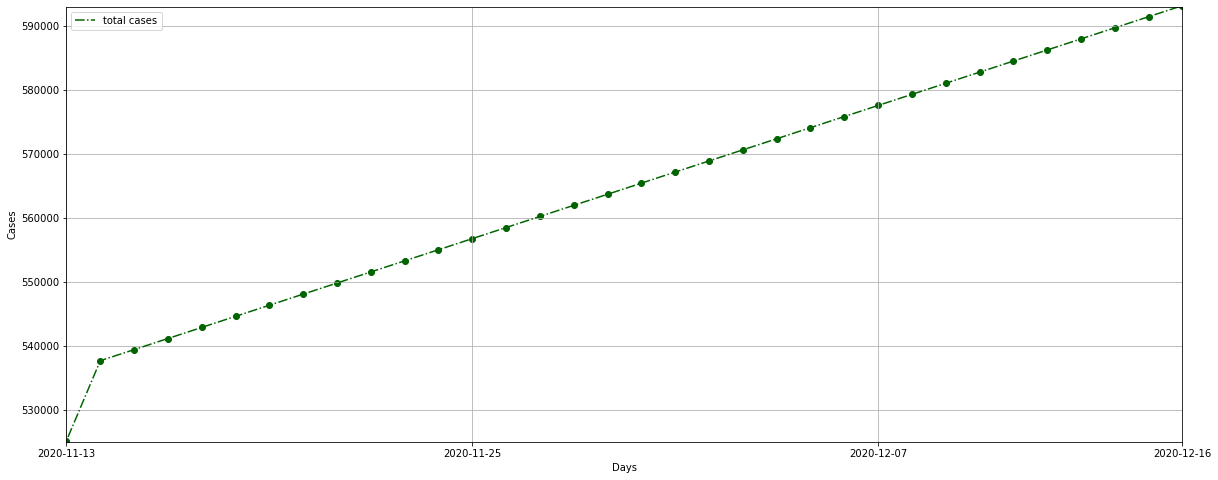

In [375]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(525000,593000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

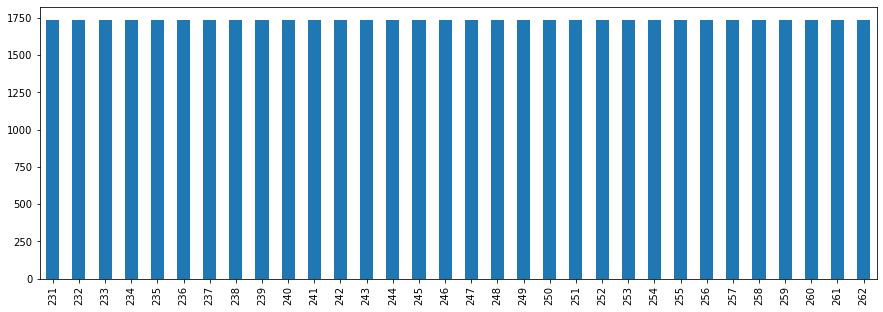

In [376]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [377]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [378]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(en.predict([[i]])[0]+219964)
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,541147.810445,2.960456
233,2020-11-17,570153,542883.089234,4.782911
234,2020-11-18,583510,544618.368023,6.665118
235,2020-11-19,598085,546353.646812,8.649499
236,2020-11-20,612665,548088.925600,10.540193
237,2020-11-21,624744,549824.204389,11.992079
238,2020-11-22,635689,551559.483178,13.234383


In [379]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [380]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [381]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [382]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=en.predict([[i]]) + 219964
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [383]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537677.252868
231,2020-11-15,539412.531657
232,2020-11-16,541147.810445
233,2020-11-17,542883.089234
234,2020-11-18,544618.368023
235,2020-11-19,546353.646812
236,2020-11-20,548088.925600
237,2020-11-21,549824.204389
238,2020-11-22,551559.483178


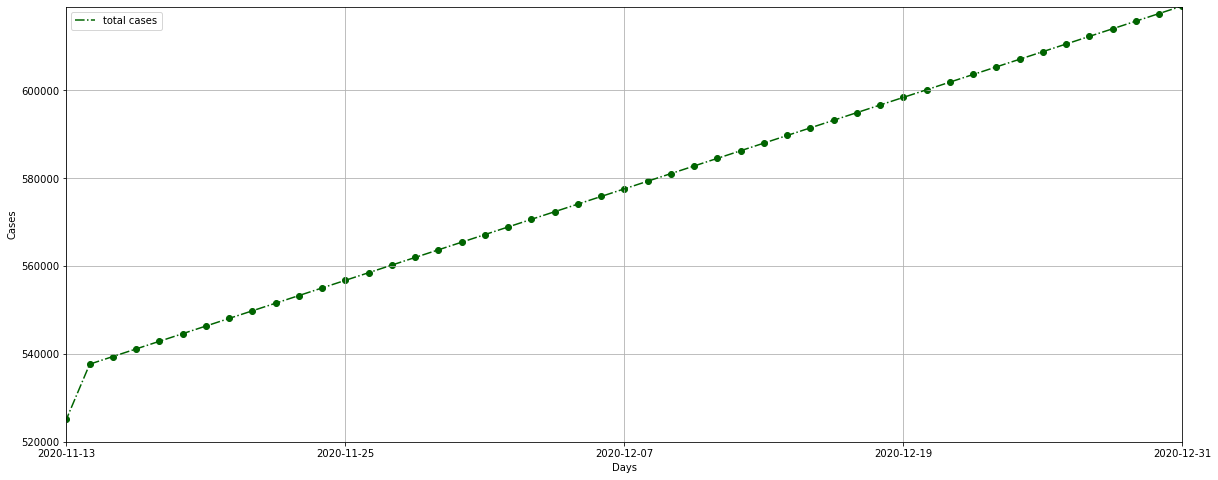

In [384]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,619000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

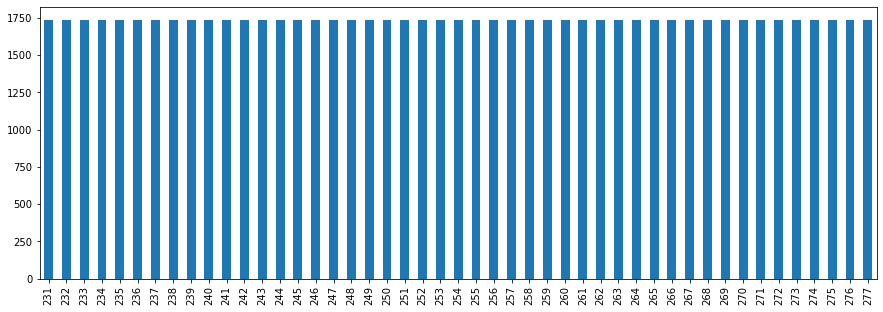

In [385]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [386]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### ElasticNet using 'Day' as a feature and TOTAL CASES as a target with alpha = 1

In [387]:
en = ElasticNet(alpha=1)

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=101)

In [389]:
en.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [390]:
predictions = en.predict(X_test)

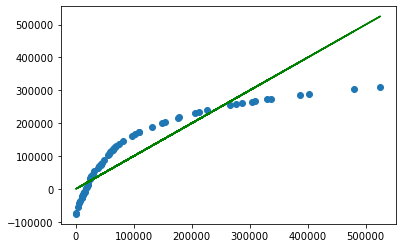

In [391]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [392]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [393]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 5.07089595768388 %
RMSE: 18.702843125464113 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [394]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [395]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [396]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=en.predict([[i]]) + 226010
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [397]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537925.284537
231,2020-11-15,539624.623814
232,2020-11-16,541323.963091
233,2020-11-17,543023.302368
234,2020-11-18,544722.641646
235,2020-11-19,546421.980923
236,2020-11-20,548121.320200
237,2020-11-21,549820.659478
238,2020-11-22,551519.998755


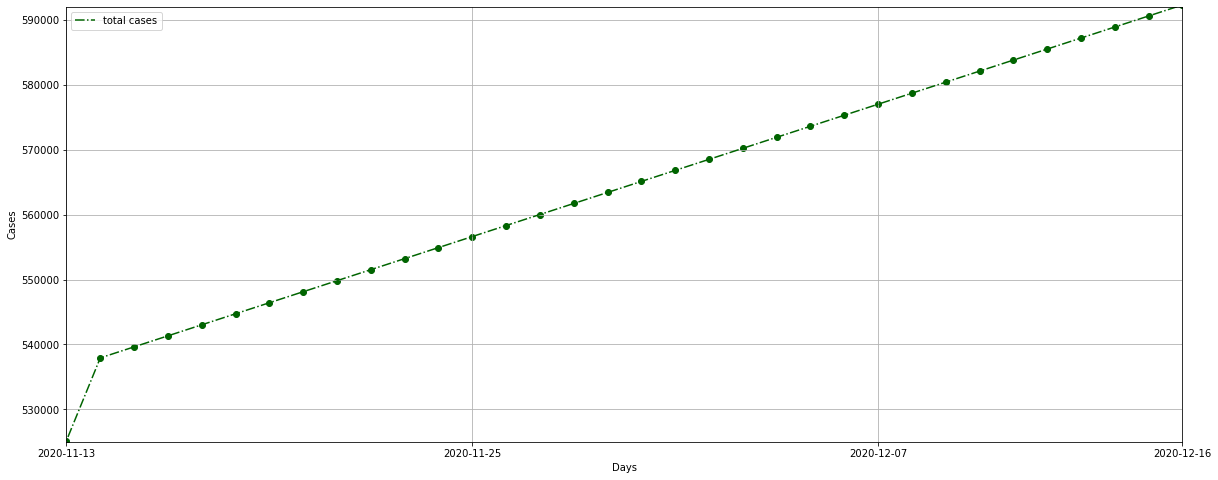

In [398]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(525000,592000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

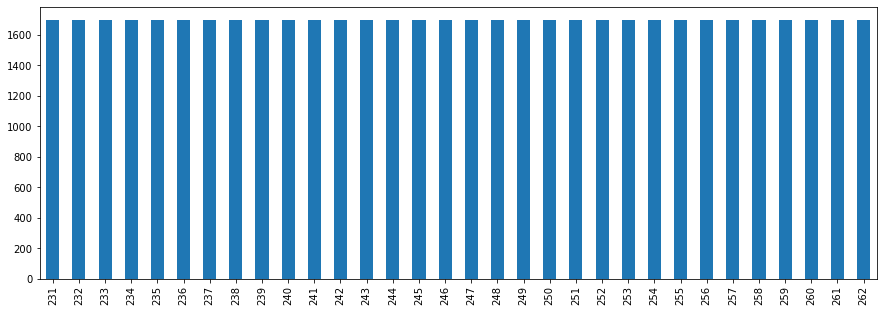

In [399]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [400]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficieny of the prognosis against real world data

In [401]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(en.predict([[i]])[0]+226010)
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,541323.963091,2.928868
233,2020-11-17,570153,543023.302368,4.758319
234,2020-11-18,583510,544722.641646,6.647248
235,2020-11-19,598085,546421.980923,8.638073
236,2020-11-20,612665,548121.320200,10.534906
237,2020-11-21,624744,549820.659478,11.992647
238,2020-11-22,635689,551519.998755,13.240594


In [402]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [403]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [404]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [405]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=en.predict([[i]]) + 226010
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [406]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537925.284537
231,2020-11-15,539624.623814
232,2020-11-16,541323.963091
233,2020-11-17,543023.302368
234,2020-11-18,544722.641646
235,2020-11-19,546421.980923
236,2020-11-20,548121.320200
237,2020-11-21,549820.659478
238,2020-11-22,551519.998755


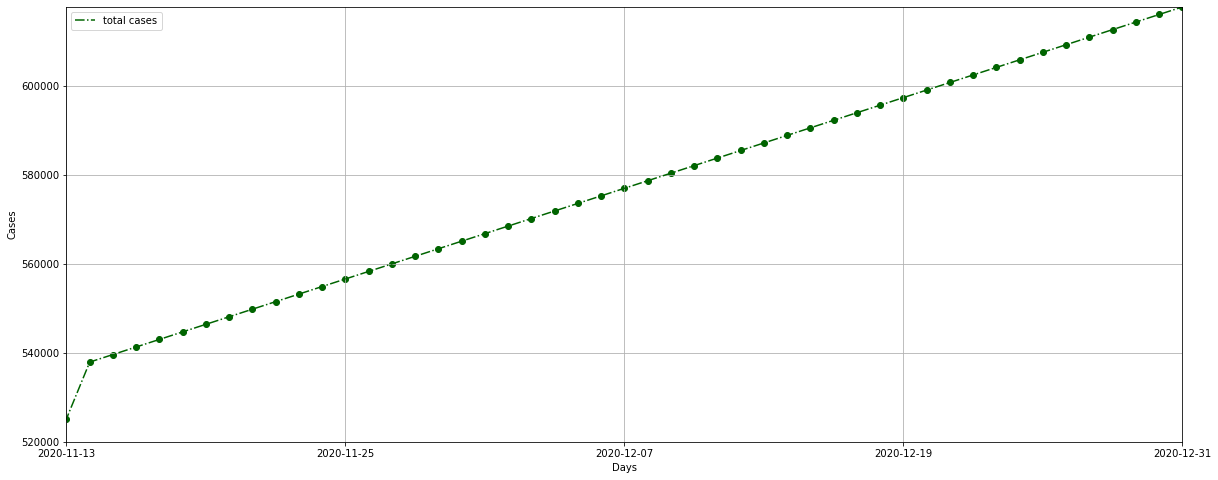

In [407]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,617794)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

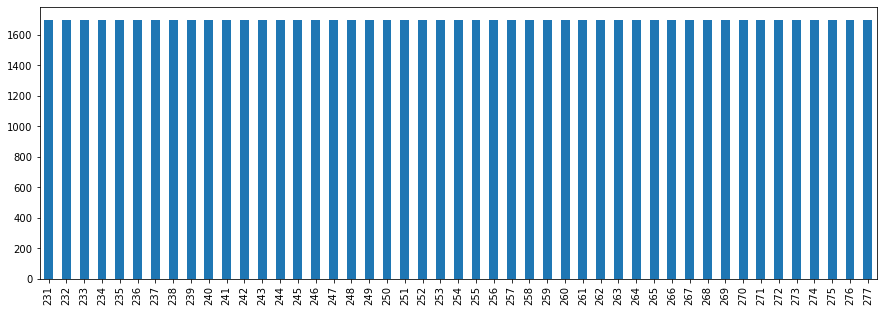

In [408]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [409]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

## Section 9

#### ElasticNetCV using 'Day' as a feature and NEW CASES as a target

Elastic Net model with iterative fitting along a regularization path.

See glossary entry for cross-validation estimator.

An estimator that has built-in cross-validation capabilities to automatically select the best hyper-parameters. Some example of cross-validation estimators are ElasticNetCV. Cross-validation estimators are named EstimatorCV and tend to be roughly equivalent to GridSearchCV(Estimator(), ...). The advantage of using a cross-validation estimator over the canonical Estimator class along with grid search is that they can take advantage of warm-starting by reusing precomputed results in the previous steps of the cross-validation process. This generally leads to speed improvements. An exception is the RidgeCV class, which can instead perform efficient Leave-One-Out CV.

In [410]:
from sklearn.linear_model import ElasticNetCV

In [411]:
X = df[['Day']]
y = df['new_cases']

In [412]:
enCV = ElasticNetCV()

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [414]:
enCV.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [415]:
predictions = enCV.predict(X_test)

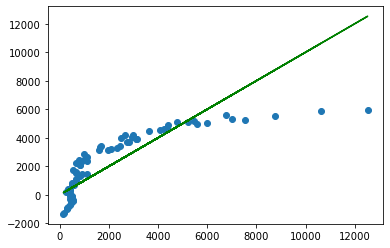

In [416]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [417]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = enCV.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = enCV.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [418]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 1.5970229675135366 %
RMSE: 4.269465926938046 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [419]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [420]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [421]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=enCV.predict([[i]]) + 6500
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [422]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,525176.000000
230,2020-11-14,12496.194216,537672.194216
231,2020-11-15,12528.356877,550200.551093
232,2020-11-16,12560.519538,562761.070630
233,2020-11-17,12592.682199,575353.752829
234,2020-11-18,12624.844860,587978.597690
235,2020-11-19,12657.007521,600635.605211
236,2020-11-20,12689.170182,613324.775393
237,2020-11-21,12721.332843,626046.108236
238,2020-11-22,12753.495505,638799.603741


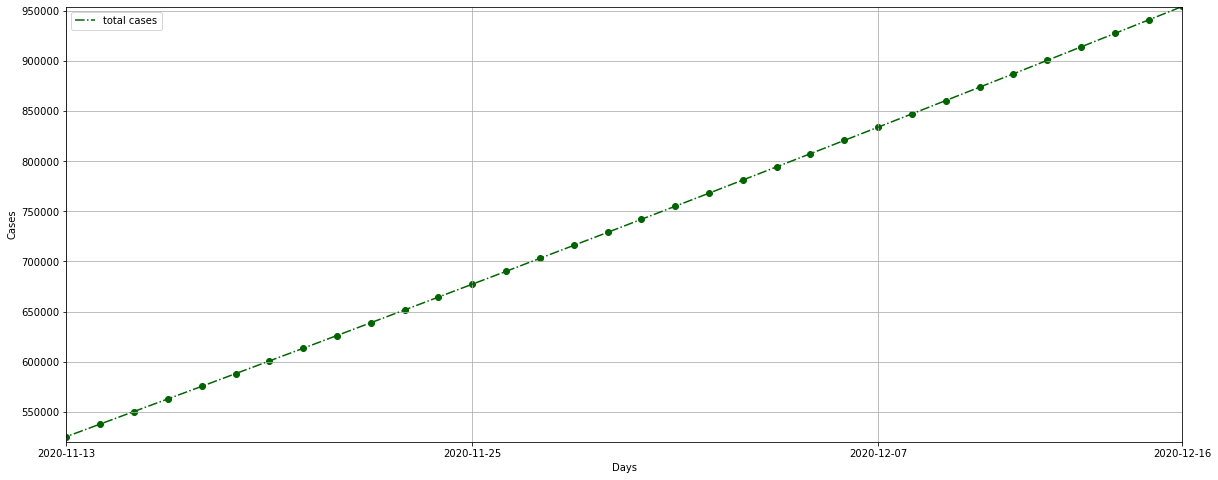

In [423]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,954000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

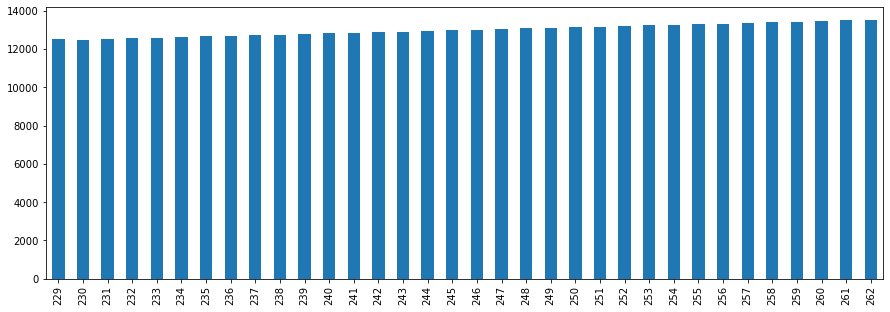

In [424]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [425]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficieny of the prognosis against real world data

In [426]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(enCV.predict([[i]])[0]+6500)
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,12560.519538,4.950865
233,2020-11-17,12496,12592.682199,0.773705
234,2020-11-18,13357,12624.844860,5.481434
235,2020-11-19,14575,12657.007521,13.159468
236,2020-11-20,14580,12689.170182,12.968654
237,2020-11-21,12079,12721.332843,5.317765
238,2020-11-22,10945,12753.495505,16.523486


In [427]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [428]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [429]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [430]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=enCV.predict([[i]]) + 6500
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [431]:
df[['date','new_cases','total_cases']][229:]

,date,new_cases,total_cases
229,2020-11-13,12524.000000,5.251760e+05
230,2020-11-14,12496.194216,5.376722e+05
231,2020-11-15,12528.356877,5.502006e+05
232,2020-11-16,12560.519538,5.627611e+05
233,2020-11-17,12592.682199,5.753538e+05
234,2020-11-18,12624.844860,5.879786e+05
235,2020-11-19,12657.007521,6.006356e+05
236,2020-11-20,12689.170182,6.133248e+05
237,2020-11-21,12721.332843,6.260461e+05
238,2020-11-22,12753.495505,6.387996e+05


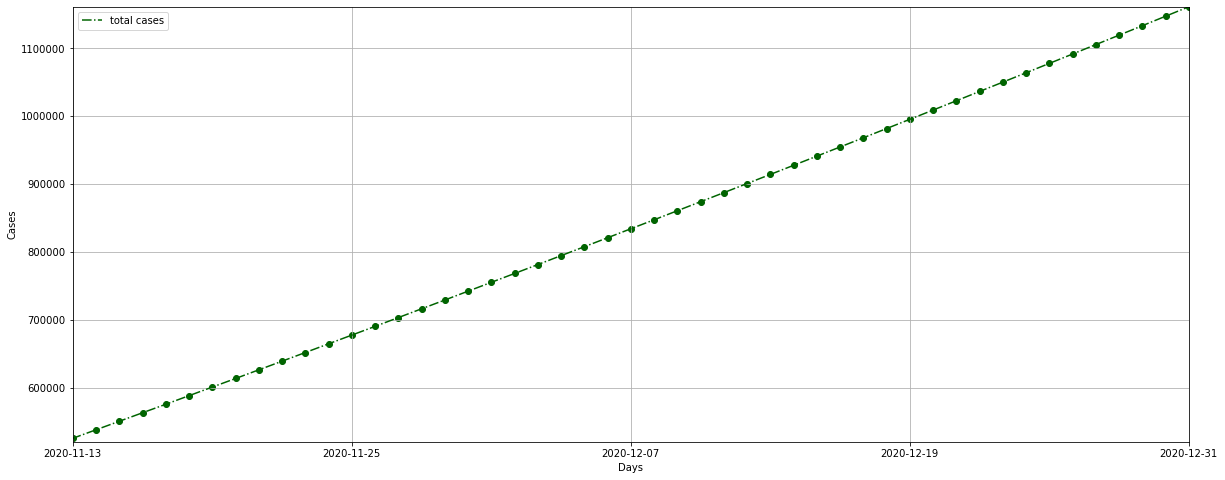

In [432]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1161000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

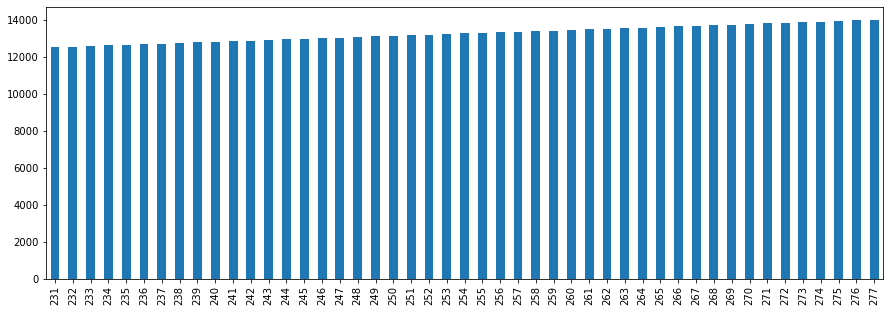

In [433]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [434]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### ElasticNetCV using 'Day' as a feature and TOTAL CASES as a target

In [435]:
X = df[['Day']]
y = df['total_cases']

In [436]:
enCV = ElasticNetCV()

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [438]:
enCV.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [439]:
predictions = enCV.predict(X_test)

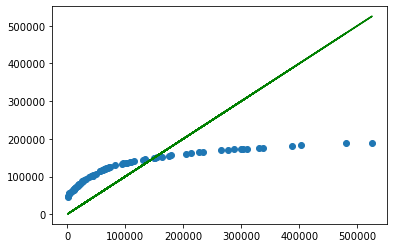

In [440]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [441]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = enCV.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = enCV.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

##### Model's Error.

In [442]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 4.229285701754797 %
RMSE: 11.721325575764883 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [443]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [444]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [445]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=enCV.predict([[i]]) + 346931
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [446]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537699.486073
231,2020-11-15,538333.260800
232,2020-11-16,538967.035527
233,2020-11-17,539600.810254
234,2020-11-18,540234.584981
235,2020-11-19,540868.359708
236,2020-11-20,541502.134435
237,2020-11-21,542135.909162
238,2020-11-22,542769.683889


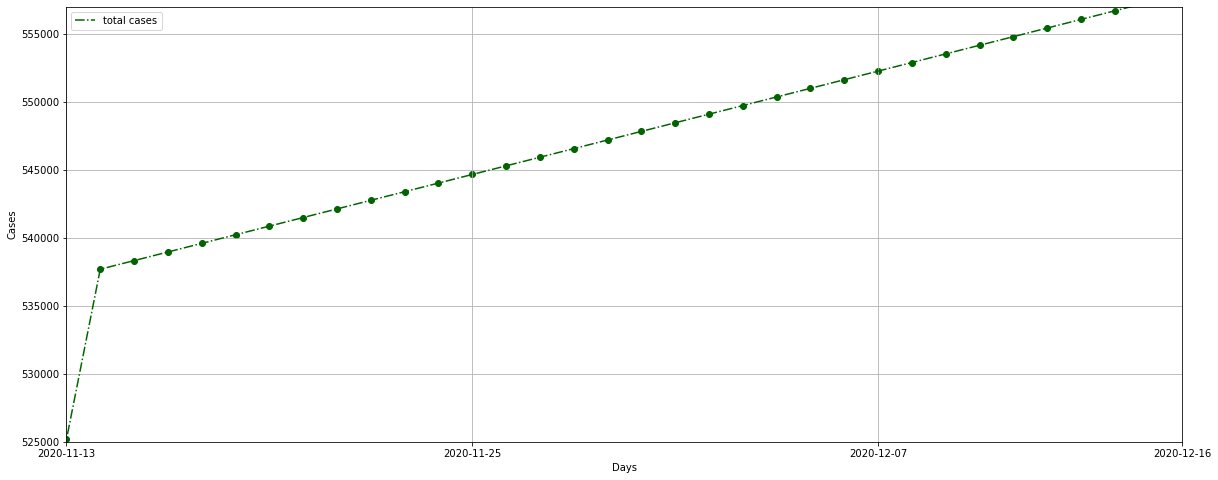

In [447]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(525000,557000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

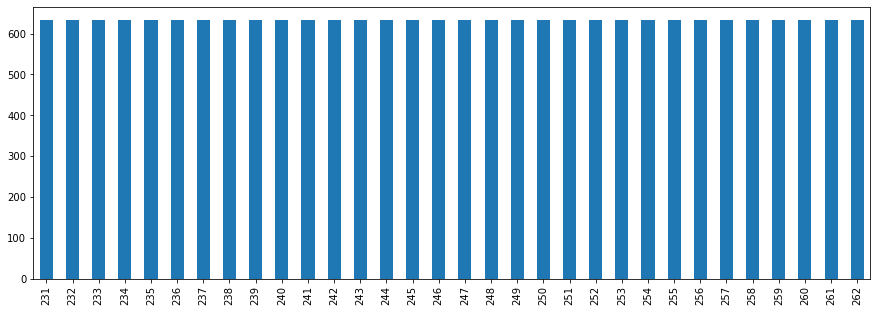

In [448]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [449]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [450]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(enCV.predict([[i]])[0]+346931)
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,538967.035527,3.351516
233,2020-11-17,570153,539600.810254,5.358595
234,2020-11-18,583510,540234.584981,7.416396
235,2020-11-19,598085,540868.359708,9.566640
236,2020-11-20,612665,541502.134435,11.615298
237,2020-11-21,624744,542135.909162,13.222711
238,2020-11-22,635689,542769.683889,14.617103


In [451]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [452]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [453]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [454]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_cases']=enCV.predict([[i]]) + 346931
    df.at[i,'new_cases']=df.at[i,'total_cases']-df.at[i-1,'total_cases']

In [455]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537699.486073
231,2020-11-15,538333.260800
232,2020-11-16,538967.035527
233,2020-11-17,539600.810254
234,2020-11-18,540234.584981
235,2020-11-19,540868.359708
236,2020-11-20,541502.134435
237,2020-11-21,542135.909162
238,2020-11-22,542769.683889


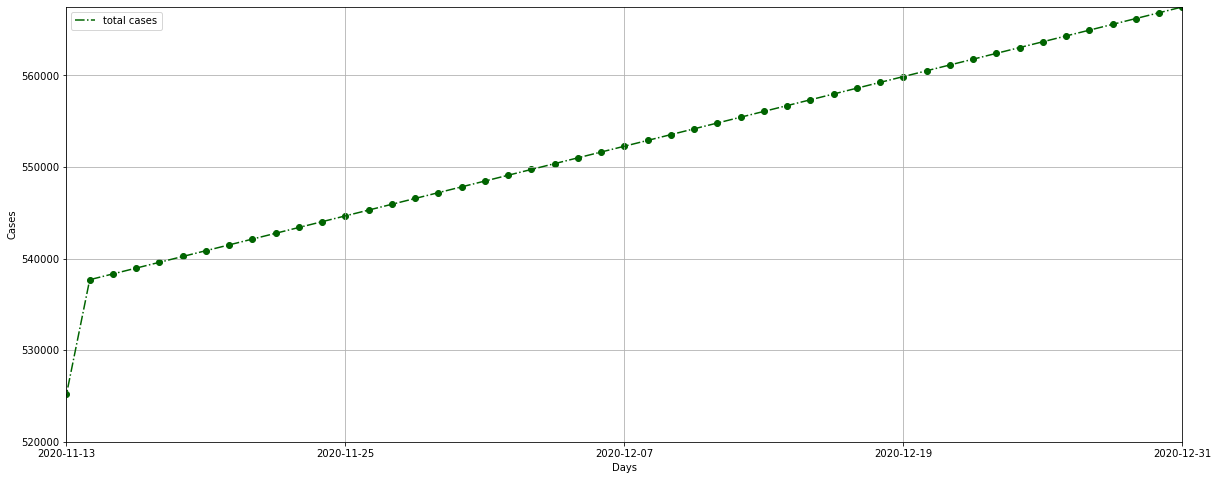

In [456]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,567486)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

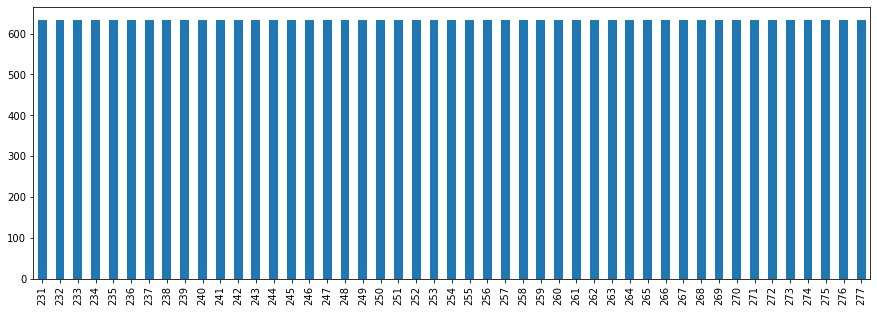

In [457]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [458]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

## Section 10

#### K-Nearest Regressor using 'Day' as a feature and NEW CASES as a target

Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [459]:
X = df[['Day']]
y = df['new_cases']

In [460]:
from sklearn.neighbors import KNeighborsRegressor

In [461]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)
    return s/len(df)

In [462]:
error=[]
for i in range(3,50):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  3


In [463]:
knr = KNeighborsRegressor(n_neighbors=3)

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [465]:
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [466]:
predictions = knr.predict(X_test)

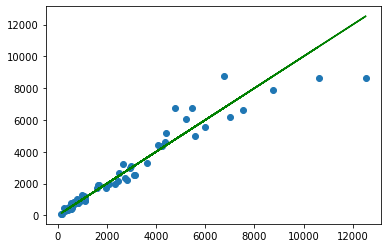

In [467]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [468]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= abs(df['new_cases'][i] - y_hat)/df['new_cases'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= ((df['new_cases'][i] - y_hat)/df['new_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))


##### Model's Error.


In [469]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 0.11768206885240479 %
RMSE: 0.2143280096747008 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [470]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16'],columns=['date'])

In [471]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [472]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=knr.predict([[i]]) + 4000
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [473]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,525176.000000
230,2020-11-14,537843.333333
231,2020-11-15,550510.666667
232,2020-11-16,563178.000000
233,2020-11-17,575845.333333
234,2020-11-18,588512.666667
235,2020-11-19,601180.000000
236,2020-11-20,613847.333333
237,2020-11-21,626514.666667
238,2020-11-22,639182.000000


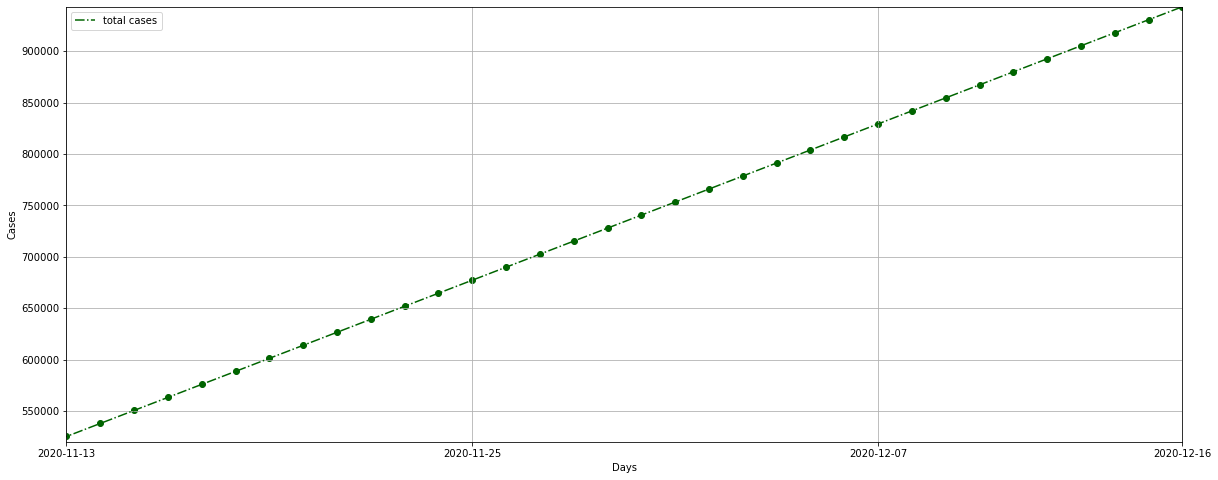

In [474]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-16')
ax.set_ylim(520000,943000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-16'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

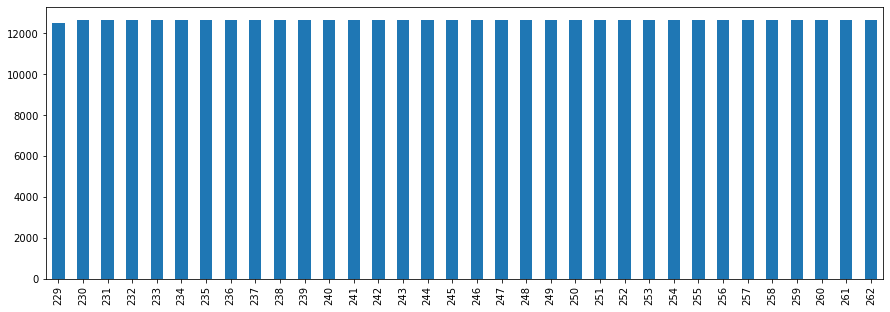

In [475]:
df['new_cases'][229:].plot.bar(figsize=(15,5))

In [476]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [477]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(knr.predict([[i]])[0]+4000)
    list2.append((abs(data.at[i,'new_cases']-list1[i-232])/data.at[i,'new_cases'])*100) 

data['pred_new_cases']=list1
data['error %']=list2
data[['date','new_cases','pred_new_cases','error %']]

,date,new_cases,pred_new_cases,error %
232,2020-11-16,11968,12667.333333,5.843360
233,2020-11-17,12496,12667.333333,1.371105
234,2020-11-18,13357,12667.333333,5.163335
235,2020-11-19,14575,12667.333333,13.088622
236,2020-11-20,14580,12667.333333,13.118427
237,2020-11-21,12079,12667.333333,4.870712
238,2020-11-22,10945,12667.333333,15.736257


In [478]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [479]:
df_temp = pd.DataFrame(['2020-11-14','2020-11-15','2020-11-16',
                       '2020-11-17','2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24','2020-11-25','2020-11-26'
                       ,'2020-11-27','2020-11-28','2020-11-29','2020-11-30','2020-12-01','2020-12-02','2020-12-03','2020-12-04',
                       '2020-12-05','2020-12-06','2020-12-07','2020-12-08','2020-12-09','2020-12-10','2020-12-11','2020-12-12',
                       '2020-12-13','2020-12-14','2020-12-15','2020-12-16','2020-12-17','2020-12-18','2020-12-19','2020-12-20'
                       ,'2020-12-21','2020-12-22','2020-12-23','2020-12-24','2020-12-25','2020-12-26','2020-12-27','2020-12-28'
                       ,'2020-12-29','2020-12-30','2020-12-31'],columns=['date'])

In [480]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [481]:
for i in range(230,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_cases']=knr.predict([[i]]) + 4000
    df.at[i,'total_cases']=df.at[i-1,'total_cases']+df.at[i,'new_cases']

In [482]:
df[['date','total_cases']][229:]

,date,total_cases
229,2020-11-13,5.251760e+05
230,2020-11-14,5.378433e+05
231,2020-11-15,5.505107e+05
232,2020-11-16,5.631780e+05
233,2020-11-17,5.758453e+05
234,2020-11-18,5.885127e+05
235,2020-11-19,6.011800e+05
236,2020-11-20,6.138473e+05
237,2020-11-21,6.265147e+05
238,2020-11-22,6.391820e+05


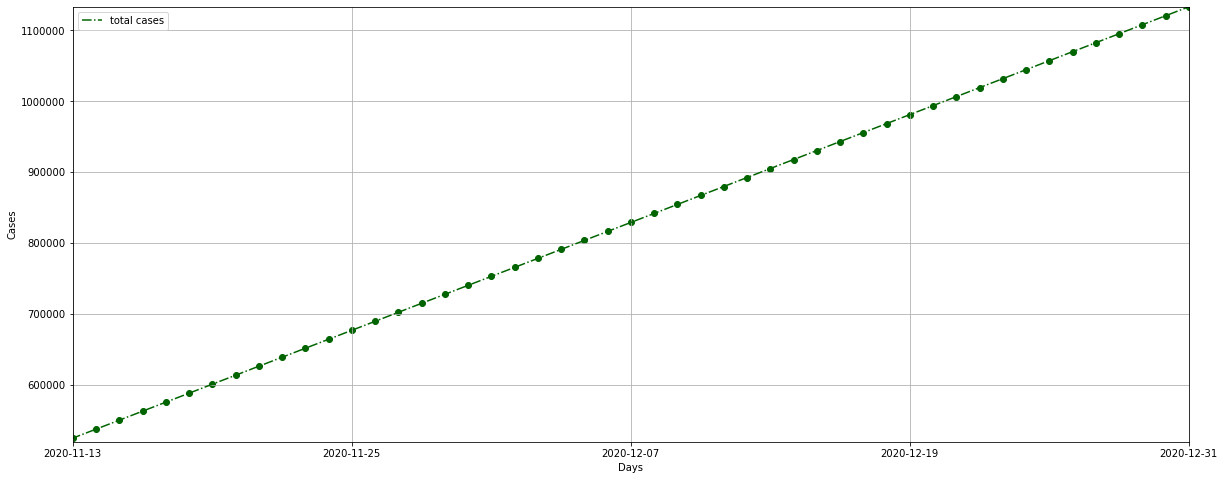

In [483]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['date'], df['total_cases'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('2020-11-13','2020-12-31')
ax.set_ylim(520000,1133000)

ax.set_xticks(['2020-11-13','2020-11-25','2020-12-07','2020-12-19','2020-12-31'])

ax.scatter(df['date'][229:],df['total_cases'][229:],c='darkgreen')

ax.grid()

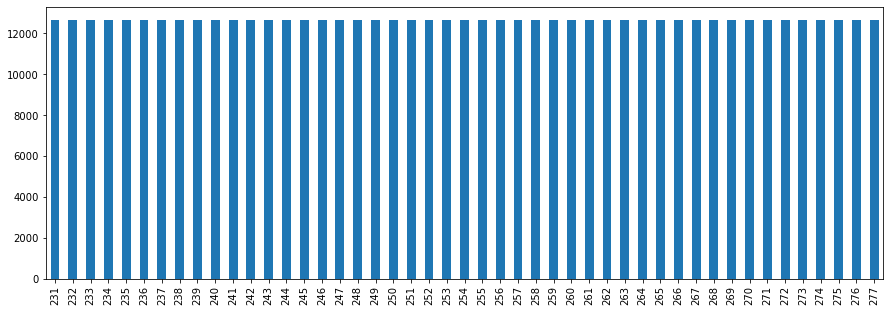

In [484]:
df['new_cases'][231:].plot.bar(figsize=(15,5))

In [485]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

#### K-Nearest Regressor using 'Day' as a feature and TOTAL CASES as a target

In [486]:
X = df[['Day']]
y = df['total_cases']

In [487]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)
    return s/len(df)

In [488]:
error=[]
for i in range(3,50):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  3


In [489]:
knr = KNeighborsRegressor(n_neighbors=3)

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [491]:
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [492]:
predictions = knr.predict(X_test)

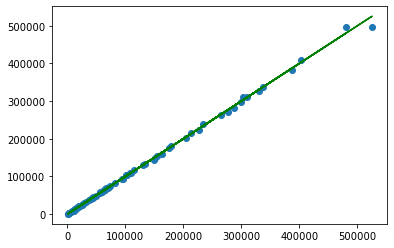

In [493]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [494]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= abs(df['total_cases'][i] - y_hat)/df['total_cases'][i]
    return 10*s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= ((df['total_cases'][i] - y_hat)/df['total_cases'][i])**2
    return s/len(df)

def RMSPE(df):
    return 10*np.sqrt(MSPE(df))

##### Model's Error.

In [495]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 0.16763838875304646 %
RMSE: 0.3851153197769381 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [496]:
list1=[]
list2=[]
for i in range(232,239):
    list1.append(knr.predict([[i]])[0]+7000)
    list2.append((abs(data.at[i,'total_cases']-list1[i-232])/data.at[i,'total_cases'])*100) 

data['pred_total_cases']=list1
data['error %']=list2
data[['date','total_cases','pred_total_cases','error %']]

,date,total_cases,pred_total_cases,error %
232,2020-11-16,557657,504571.333333,9.519412
233,2020-11-17,570153,504571.333333,11.502468
234,2020-11-18,583510,504571.333333,13.528246
235,2020-11-19,598085,504571.333333,15.635514
236,2020-11-20,612665,504571.333333,17.643193
237,2020-11-21,624744,504571.333333,19.235506
238,2020-11-22,635689,504571.333333,20.626071


In [497]:
list=np.arange(230,len(df))
df.drop(list,axis=0,inplace=True)

## Section 11

In [498]:
res_1 = {'Linear': [1.68, 4.96], 'Non-Linear': [0.199, 0.05], 'Lasso': [1.77, 5.23], 'Ridge': [1.60, 4.94],
         'Kernel Ridge': [1.03, 1.386], 'ElasticNet 0.1': [1.69, 5.23], 'ElasticNet 1': [1.62, 5.07], 'ElasticNetCV': [1.59, 4.26],
         'KNR': [0.11, 0.21]}

In [499]:
res_2 = {'Linear': [4.6, 18.3], 'Non-Linear': [0.49, 0.19], 'Lasso': [4.91, 19.29], 'Ridge': [4.41, 18.2],
         'Kernel Ridge': [1.37, 1.82], 'ElasticNet 0.1': [4.65, 19.29], 'ElasticNet 1': [4.41, 18.7], 'ElasticNetCV': [4.22, 11.7],
         'KNR': [0.16, 0.385]}

In [500]:
df1 = pd.DataFrame(data=res_1)
df1.index = ['to predict new cases','to predict total cases']

#### Mean Absolute Error Table  ( Unit % )

In [501]:
df1

,Linear,Non-Linear,Lasso,Ridge,Kernel Ridge,ElasticNet 0.1,ElasticNet 1,ElasticNetCV,KNR
to predict new cases,1.68,0.199,1.77,1.60,1.030,1.69,1.62,1.59,0.11
to predict total cases,4.96,0.050,5.23,4.94,1.386,5.23,5.07,4.26,0.21


In [502]:
df2 = pd.DataFrame(data=res_2)
df2.index = ['to predict new cases','to predict total cases']

#### Root Mean Squared Error Table ( Unit % )

In [503]:
df2

,Linear,Non-Linear,Lasso,Ridge,Kernel Ridge,ElasticNet 0.1,ElasticNet 1,ElasticNetCV,KNR
to predict new cases,4.6,0.49,4.91,4.41,1.37,4.65,4.41,4.22,0.160
to predict total cases,18.3,0.19,19.29,18.20,1.82,19.29,18.70,11.70,0.385


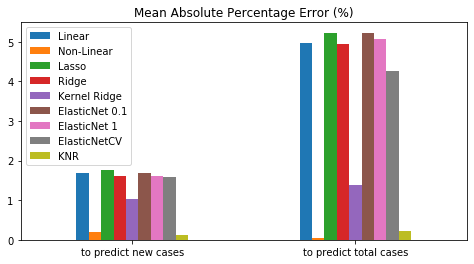

In [504]:
df1.plot.bar(rot=0,figsize=(8,4),title='Mean Absolute Percentage Error (%)')

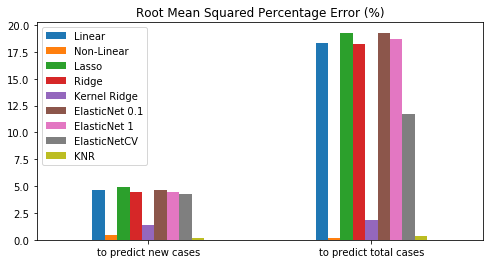

In [505]:
df2.plot.bar(rot=0,figsize=(8,4),title='Root Mean Squared Percentage Error (%)')

The End..